In [1]:
#libraries used
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn
import missingno as msno
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
#import datafile
data = pd.read_csv('C:/Users/ericy/Desktop/medical_raw_data.csv')


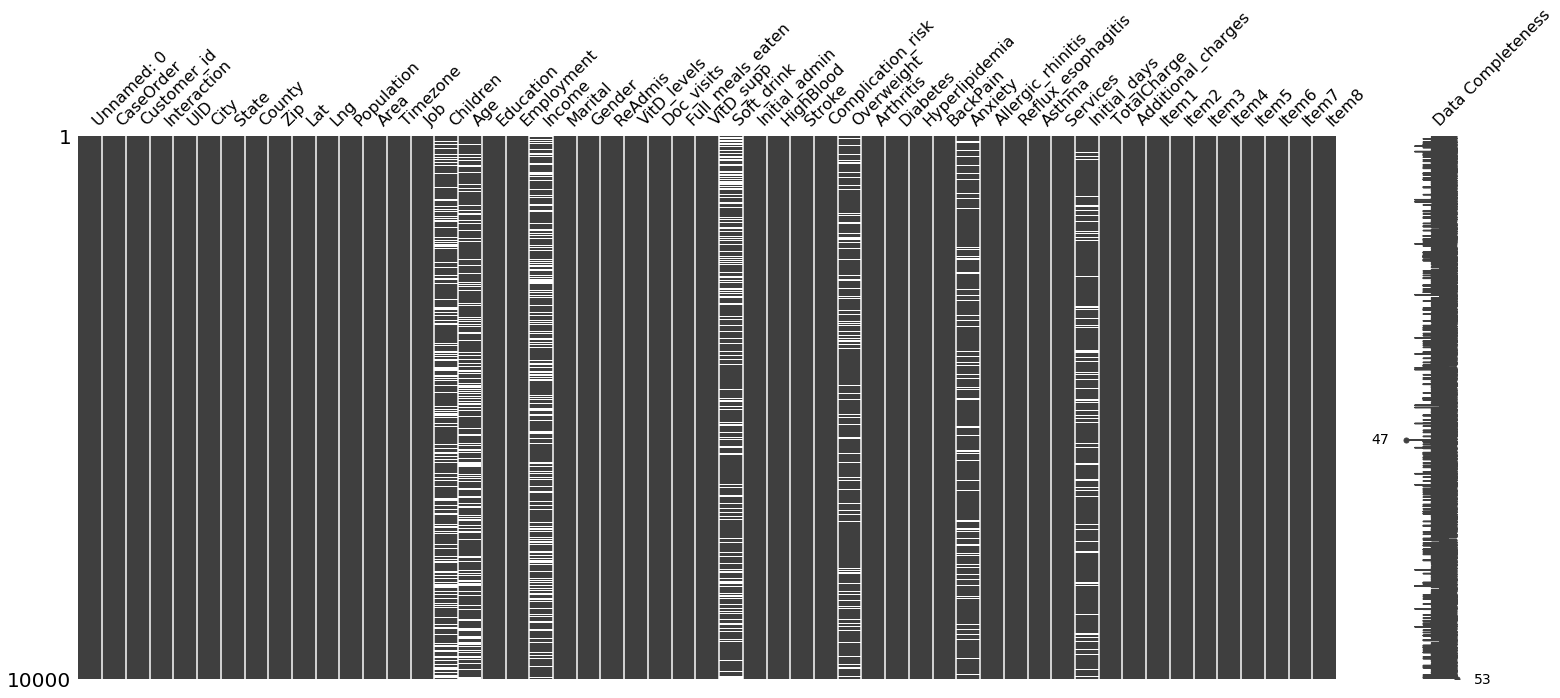

In [3]:
# Graph variables to visualize missing data
msno.matrix(data, labels=True)

In [4]:
#find out shape, create 'Index' variable, Drop 'Unnamed:0'.
data.shape
data['Index'] = pd.Series(range(0, 10000))
#Note https://appdividend.com/2020/06/01/pandas-dataframe-drop-method-in-python/ for .drop() method in PA
data.drop(['Unnamed: 0'], axis=1, inplace=True)
#Move 'Index' to beginning of data.
column_to_move = data.pop('Index')
data.insert(0, 'Index', column_to_move)
data.head()

,Index,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,...,3191.048774,17939.403420,3,3,2,2,4,3,3,4
1,1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,...,4214.905346,17612.998120,3,4,3,4,4,4,3,3
2,2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,...,2177.586768,17505.192460,2,4,4,4,3,4,3,3
3,3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,...,2465.118965,12993.437350,3,5,5,3,4,5,5,5
4,4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,...,1885.655137,3716.525786,2,1,3,3,5,3,4,3


In [5]:
#Double check which variables have null values
data.isnull().any()

Index                 False
CaseOrder             False
Customer_id           False
Interaction           False
UID                   False
City                  False
State                 False
County                False
Zip                   False
Lat                   False
Lng                   False
Population            False
Area                  False
Timezone              False
Job                   False
Children               True
Age                    True
Education             False
Employment            False
Income                 True
Marital               False
Gender                False
ReAdmis               False
VitD_levels           False
Doc_visits            False
Full_meals_eaten      False
VitD_supp             False
Soft_drink             True
Initial_admin         False
HighBlood             False
Stroke                False
Complication_risk     False
Overweight             True
Arthritis             False
Diabetes              False
Hyperlipidemia      

In [6]:
#Total null cases in each variable
data.isnull().sum()
#Variables to address with null values: Children, Age, Income, Soft_drink, Overweight, Anxiety, Initial_days.


Index                    0
CaseOrder                0
Customer_id              0
Interaction              0
UID                      0
City                     0
State                    0
County                   0
Zip                      0
Lat                      0
Lng                      0
Population               0
Area                     0
Timezone                 0
Job                      0
Children              2588
Age                   2414
Education                0
Employment               0
Income                2464
Marital                  0
Gender                   0
ReAdmis                  0
VitD_levels              0
Doc_visits               0
Full_meals_eaten         0
VitD_supp                0
Soft_drink            2467
Initial_admin            0
HighBlood                0
Stroke                   0
Complication_risk        0
Overweight             982
Arthritis                0
Diabetes                 0
Hyperlipidemia           0
BackPain                 0
A

In [7]:
#Rename Item1-Item8 variables to names provided in data's supplemental PDF.
#Also rename 'CaseOrder', 'ReAdmis', 'HighBlood', 'BackPain', and 'TotalCharge' to have the same syntax in variable naming across the dataset
#Note https://re-thought.com/guide-to-renaming-columns-with-python-pandas/ for .rename() method
data.rename(columns={'CaseOrder':'Case_order','ReAdmis':'Readmis','HighBlood':'High_blood','BackPain':'Back_pain','TotalCharge':'Total_charge','Item1':'Timely_admission', 'Item2':'Timely_treatment', 'Item3':'Timely_visits', 'Item4':'Reliability', 'Item5':'Options', 'Item6':'Hours', 'Item7':'Courteous', 'Item8':'Active_listen'}, inplace=True)


In [8]:
#Check that variables were correctly renamed
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Index               10000 non-null  int64  
 1   Case_order          10000 non-null  int64  
 2   Customer_id         10000 non-null  object 
 3   Interaction         10000 non-null  object 
 4   UID                 10000 non-null  object 
 5   City                10000 non-null  object 
 6   State               10000 non-null  object 
 7   County              10000 non-null  object 
 8   Zip                 10000 non-null  int64  
 9   Lat                 10000 non-null  float64
 10  Lng                 10000 non-null  float64
 11  Population          10000 non-null  int64  
 12  Area                10000 non-null  object 
 13  Timezone            10000 non-null  object 
 14  Job                 10000 non-null  object 
 15  Children            7412 non-null   float64
 16  Age  

In [9]:
#Address missing values in 'Soft_drink'
print(data['Soft_drink'])
data['Soft_drink'].fillna(0, inplace=True)
data.isnull().sum()

0       NaN
1        No
2        No
3        No
4       Yes
       ... 
9995     No
9996     No
9997    Yes
9998     No
9999     No
Name: Soft_drink, Length: 10000, dtype: object


Index                    0
Case_order               0
Customer_id              0
Interaction              0
UID                      0
City                     0
State                    0
County                   0
Zip                      0
Lat                      0
Lng                      0
Population               0
Area                     0
Timezone                 0
Job                      0
Children              2588
Age                   2414
Education                0
Employment               0
Income                2464
Marital                  0
Gender                   0
Readmis                  0
VitD_levels              0
Doc_visits               0
Full_meals_eaten         0
VitD_supp                0
Soft_drink               0
Initial_admin            0
High_blood               0
Stroke                   0
Complication_risk        0
Overweight             982
Arthritis                0
Diabetes                 0
Hyperlipidemia           0
Back_pain                0
A

In [10]:
#Address missing values in 'Anxiety'

(array([7094.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2906.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

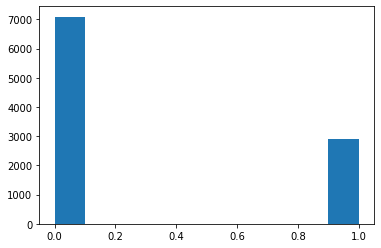

In [11]:
data['Anxiety'].fillna(0, inplace=True)
plt.hist(data['Anxiety'])

In [12]:
#Address missing values in 'Overweight'

(array([3605.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        6395.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

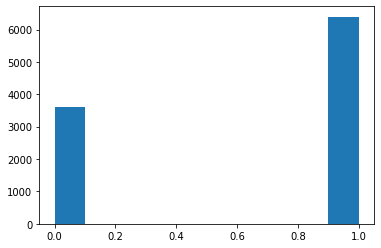

In [13]:
data['Overweight'].fillna(0, inplace=True)
plt.hist(data['Overweight'])

In [14]:
# Check for null values
data.isnull().sum()

Index                    0
Case_order               0
Customer_id              0
Interaction              0
UID                      0
City                     0
State                    0
County                   0
Zip                      0
Lat                      0
Lng                      0
Population               0
Area                     0
Timezone                 0
Job                      0
Children              2588
Age                   2414
Education                0
Employment               0
Income                2464
Marital                  0
Gender                   0
Readmis                  0
VitD_levels              0
Doc_visits               0
Full_meals_eaten         0
VitD_supp                0
Soft_drink               0
Initial_admin            0
High_blood               0
Stroke                   0
Complication_risk        0
Overweight               0
Arthritis                0
Diabetes                 0
Hyperlipidemia           0
Back_pain                0
A

In [15]:
#Address null values in 'Children'.


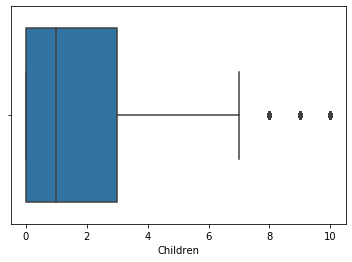

In [16]:
seaborn.boxplot(data['Children'])

(array([1880., 4446., 1094., 1113.,  739.,  126.,  145.,  154.,  157.,
         146.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

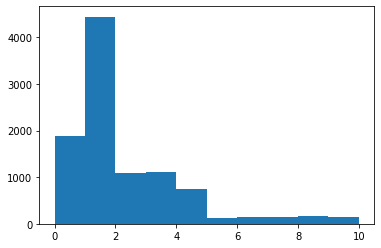

In [17]:
data['Children'].fillna(data['Children'].median(), inplace=True)
plt.hist(data['Children'])

In [18]:
data.isnull().sum()

Index                    0
Case_order               0
Customer_id              0
Interaction              0
UID                      0
City                     0
State                    0
County                   0
Zip                      0
Lat                      0
Lng                      0
Population               0
Area                     0
Timezone                 0
Job                      0
Children                 0
Age                   2414
Education                0
Employment               0
Income                2464
Marital                  0
Gender                   0
Readmis                  0
VitD_levels              0
Doc_visits               0
Full_meals_eaten         0
VitD_supp                0
Soft_drink               0
Initial_admin            0
High_blood               0
Stroke                   0
Complication_risk        0
Overweight               0
Arthritis                0
Diabetes                 0
Hyperlipidemia           0
Back_pain                0
A

In [19]:
#Address null values in 'Age'.

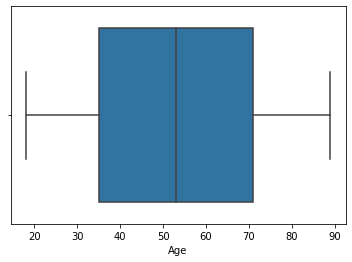

In [20]:
seaborn.boxplot(data['Age'])

In [21]:
data['Age'].fillna(method='backfill', inplace=True)
data.isnull().sum()
data['Age'].fillna(method='ffill', inplace=True)
data.isnull().sum()

Index                    0
Case_order               0
Customer_id              0
Interaction              0
UID                      0
City                     0
State                    0
County                   0
Zip                      0
Lat                      0
Lng                      0
Population               0
Area                     0
Timezone                 0
Job                      0
Children                 0
Age                      0
Education                0
Employment               0
Income                2464
Marital                  0
Gender                   0
Readmis                  0
VitD_levels              0
Doc_visits               0
Full_meals_eaten         0
VitD_supp                0
Soft_drink               0
Initial_admin            0
High_blood               0
Stroke                   0
Complication_risk        0
Overweight               0
Arthritis                0
Diabetes                 0
Hyperlipidemia           0
Back_pain                0
A

(array([1075., 1013.,  984.,  985.,  985.,  962.,  965., 1004.,  944.,
        1083.]),
 array([18. , 25.1, 32.2, 39.3, 46.4, 53.5, 60.6, 67.7, 74.8, 81.9, 89. ]),
 <a list of 10 Patch objects>)

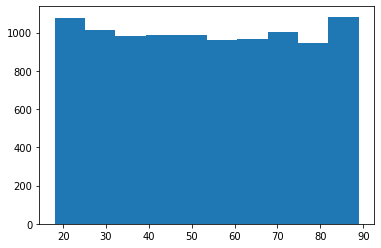

In [22]:
plt.hist(data['Age'])

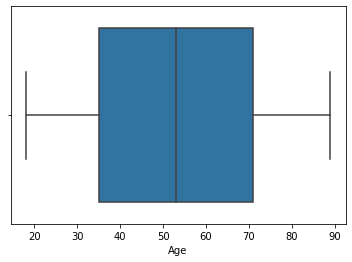

In [23]:
seaborn.boxplot(data['Age'])

In [24]:
#Address null values in 'Income'

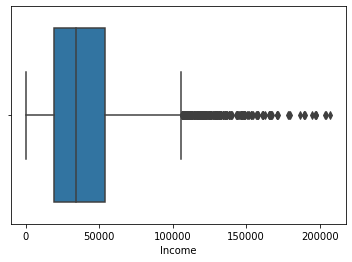

In [25]:
seaborn.boxplot(data['Income'])

In [26]:
data['Income'].fillna(data['Income'].median(), inplace=True)

(array([2068., 4990., 1532.,  790.,  340.,  156.,   67.,   34.,   12.,
          11.]),
 array([1.54080000e+02, 2.08635850e+04, 4.15730900e+04, 6.22825950e+04,
        8.29921000e+04, 1.03701605e+05, 1.24411110e+05, 1.45120615e+05,
        1.65830120e+05, 1.86539625e+05, 2.07249130e+05]),
 <a list of 10 Patch objects>)

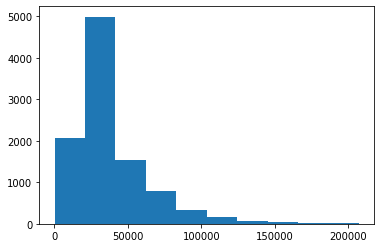

In [27]:
plt.hist(data['Income'])

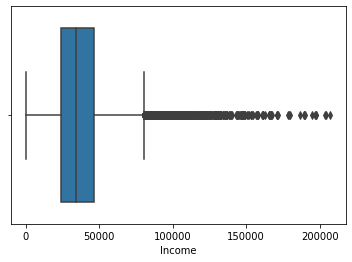

In [28]:
seaborn.boxplot(data['Income'])

In [29]:
#Check data for null values.
data.isnull().sum()

Index                    0
Case_order               0
Customer_id              0
Interaction              0
UID                      0
City                     0
State                    0
County                   0
Zip                      0
Lat                      0
Lng                      0
Population               0
Area                     0
Timezone                 0
Job                      0
Children                 0
Age                      0
Education                0
Employment               0
Income                   0
Marital                  0
Gender                   0
Readmis                  0
VitD_levels              0
Doc_visits               0
Full_meals_eaten         0
VitD_supp                0
Soft_drink               0
Initial_admin            0
High_blood               0
Stroke                   0
Complication_risk        0
Overweight               0
Arthritis                0
Diabetes                 0
Hyperlipidemia           0
Back_pain                0
A

In [30]:
#Begin analyzing 'Initial_days'

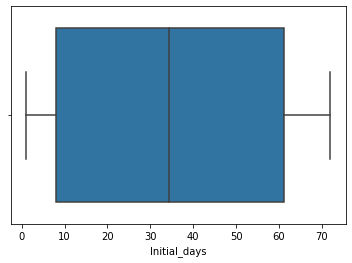

In [31]:
seaborn.boxplot(data['Initial_days'])

(array([2577., 1591.,  662.,  145.,   32.,  256.,  559., 1022., 1464.,
        1692.]),
 array([ 1.00198092,  8.09993146, 15.197882  , 22.29583253, 29.39378307,
        36.49173361, 43.58968415, 50.68763469, 57.78558522, 64.88353576,
        71.9814863 ]),
 <a list of 10 Patch objects>)

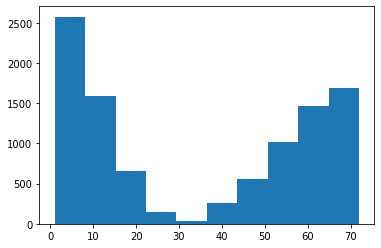

In [32]:
data['Initial_days'].fillna(method='backfill', inplace=True)
plt.hist(data['Initial_days'])

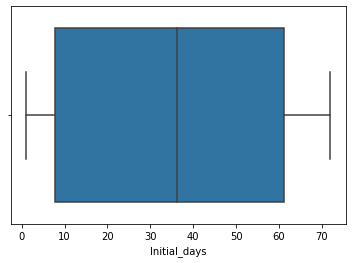

In [33]:
seaborn.boxplot(data['Initial_days'])

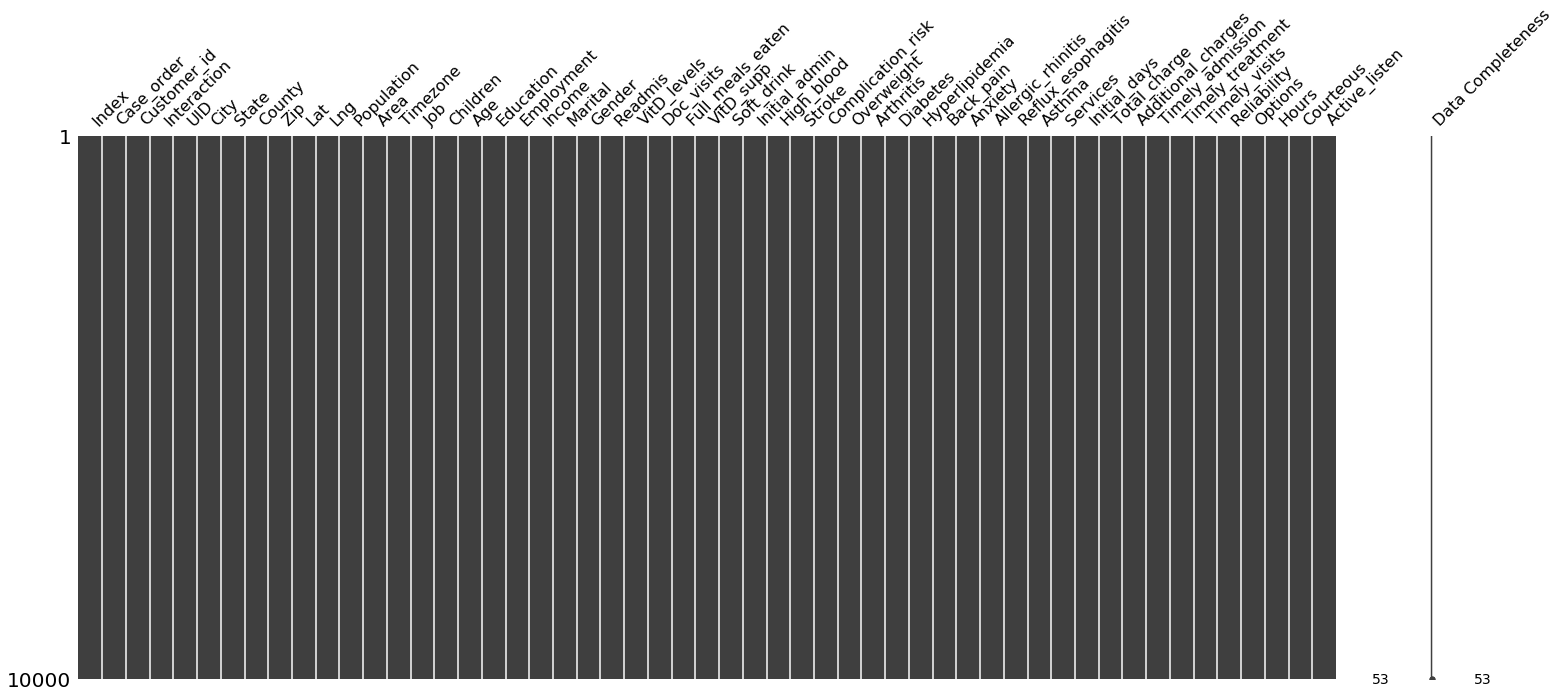

In [34]:
msno.matrix(data, labels=True)

In [35]:
data.isnull().sum()

Index                 0
Case_order            0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
Timezone              0
Job                   0
Children              0
Age                   0
Education             0
Employment            0
Income                0
Marital               0
Gender                0
Readmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
VitD_supp             0
Soft_drink            0
Initial_admin         0
High_blood            0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
Back_pain             0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services        

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Index               10000 non-null  int64  
 1   Case_order          10000 non-null  int64  
 2   Customer_id         10000 non-null  object 
 3   Interaction         10000 non-null  object 
 4   UID                 10000 non-null  object 
 5   City                10000 non-null  object 
 6   State               10000 non-null  object 
 7   County              10000 non-null  object 
 8   Zip                 10000 non-null  int64  
 9   Lat                 10000 non-null  float64
 10  Lng                 10000 non-null  float64
 11  Population          10000 non-null  int64  
 12  Area                10000 non-null  object 
 13  Timezone            10000 non-null  object 
 14  Job                 10000 non-null  object 
 15  Children            10000 non-null  float64
 16  Age  

In [37]:
data.head()

,Index,Case_order,Customer_id,Interaction,UID,City,State,County,Zip,Lat,...,Total_charge,Additional_charges,Timely_admission,Timely_treatment,Timely_visits,Reliability,Options,Hours,Courteous,Active_listen
0,0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,...,3191.048774,17939.403420,3,3,2,2,4,3,3,4
1,1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,...,4214.905346,17612.998120,3,4,3,4,4,4,3,3
2,2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,...,2177.586768,17505.192460,2,4,4,4,3,4,3,3
3,3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,...,2465.118965,12993.437350,3,5,5,3,4,5,5,5
4,4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,...,1885.655137,3716.525786,2,1,3,3,5,3,4,3


(array([6331.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3669.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

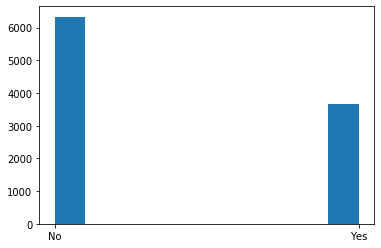

In [38]:
plt.hist(data['Readmis'])

In [39]:
#Reexpression of 'Readmis' data as numeric
data['Readmis'] = data['Readmis'].astype(str)
data['Readmis'].replace(('Yes','No'), (1,0), inplace=True)

(array([6331.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3669.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

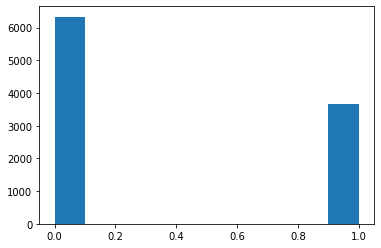

In [40]:
plt.hist(data['Readmis'])

In [41]:
#Reexpression of 'Soft_drink' data as numeric
data['Soft_drink'] = data['Soft_drink'].astype(str)
data['Soft_drink'].replace(('Yes','No'), (1,0), inplace=True)

(array([4090.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        5910.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

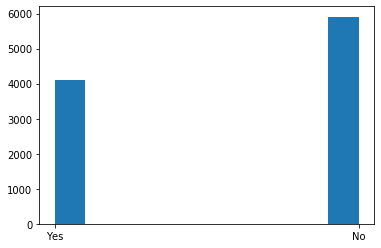

In [42]:
plt.hist(data['High_blood'])

In [43]:
#Reexpression of 'High_blood' data as numeric
data['High_blood'] = data['High_blood'].astype(str)
data['High_blood'].replace(('Yes','No'), (1,0), inplace=True)

(array([5910.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4090.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

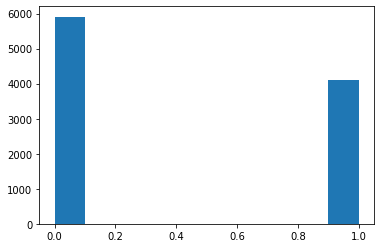

In [44]:
plt.hist(data['High_blood'])

(array([8007.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1993.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

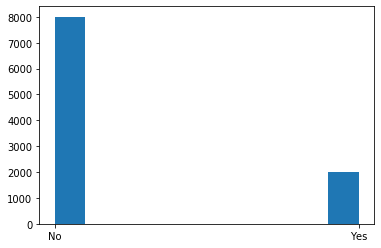

In [45]:
#Reexpression of 'Stroke' data as numeric
plt.hist(data['Stroke'])

In [46]:
#Reexpression of 'Stroke' data as numeric
data['Stroke'] = data['Stroke'].astype(str)
data['Stroke'].replace(('Yes','No'), (1,0), inplace=True)

(array([8007.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1993.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

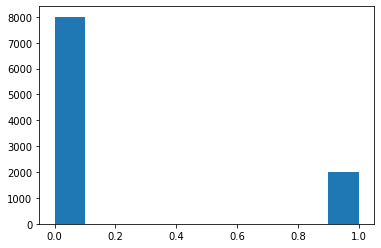

In [47]:
plt.hist(data['Stroke'])

(array([3574.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        6426.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

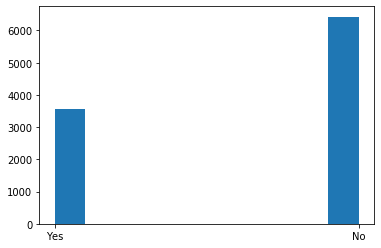

In [48]:
#Reexpression of 'Arthritis' data as numeric
plt.hist(data['Arthritis'])

In [49]:
#Reexpression of 'Arthritis' data as numeric
data['Arthritis'] = data['Arthritis'].astype(str)
data['Arthritis'].replace(('Yes','No'), (1,0), inplace=True)

(array([6426.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3574.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

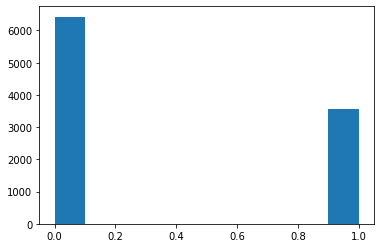

In [50]:
plt.hist(data['Arthritis'])

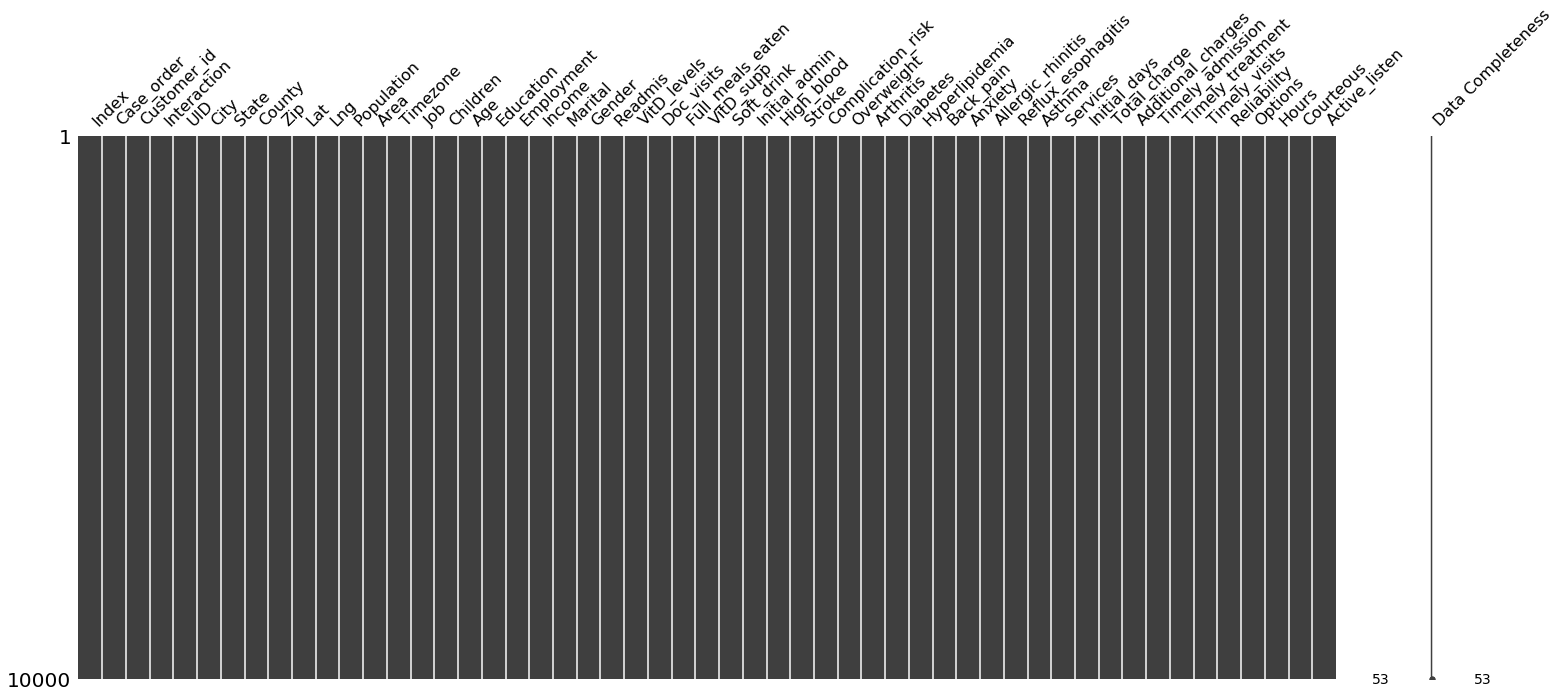

In [51]:
msno.matrix(data, labels=True)

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Index               10000 non-null  int64  
 1   Case_order          10000 non-null  int64  
 2   Customer_id         10000 non-null  object 
 3   Interaction         10000 non-null  object 
 4   UID                 10000 non-null  object 
 5   City                10000 non-null  object 
 6   State               10000 non-null  object 
 7   County              10000 non-null  object 
 8   Zip                 10000 non-null  int64  
 9   Lat                 10000 non-null  float64
 10  Lng                 10000 non-null  float64
 11  Population          10000 non-null  int64  
 12  Area                10000 non-null  object 
 13  Timezone            10000 non-null  object 
 14  Job                 10000 non-null  object 
 15  Children            10000 non-null  float64
 16  Age  

(array([2738.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        7262.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

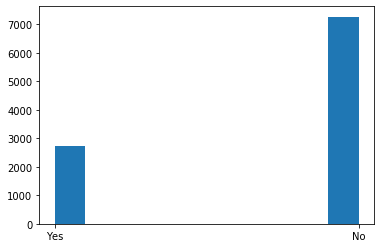

In [53]:
plt.hist(data['Diabetes'])

In [54]:
#Reexpression of 'Diabetes' data as numeric
data['Diabetes'] = data['Diabetes'].astype(str)
data['Diabetes'].replace(('Yes','No'), (1,0), inplace=True)

(array([7262.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2738.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

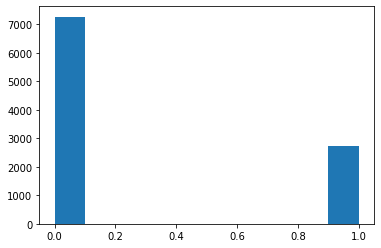

In [55]:
plt.hist(data['Diabetes'])

(array([6628.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3372.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

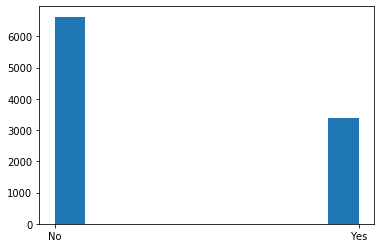

In [56]:
#Reexpression of 'Hyperlipidemia' data as numeric
plt.hist(data['Hyperlipidemia'])

In [57]:
data['Hyperlipidemia'] = data['Hyperlipidemia'].astype(str)
data['Hyperlipidemia'].replace(('Yes','No'), (1,0), inplace=True)

(array([6628.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3372.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

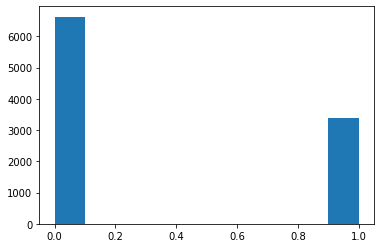

In [58]:
plt.hist(data['Hyperlipidemia'])

(array([4114.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        5886.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

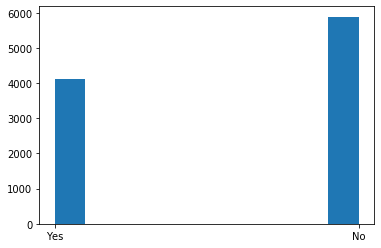

In [59]:
#Reexpression of 'Back_pain' data as numeric
plt.hist(data['Back_pain'])

In [60]:
data['Back_pain'] = data['Back_pain'].astype(str)
data['Back_pain'].replace(('Yes','No'), (1,0), inplace=True)

(array([5886.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4114.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

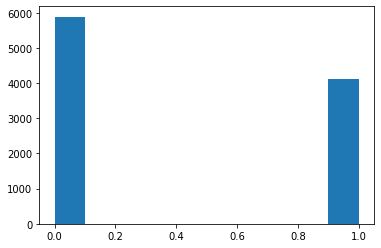

In [61]:
plt.hist(data['Back_pain'])

(array([3941.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        6059.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

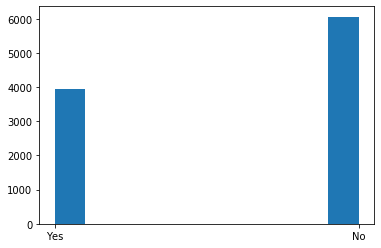

In [62]:
#Reexpression of 'Allergic_rhinitis' as numeric
plt.hist(data['Allergic_rhinitis'])

In [63]:
data['Allergic_rhinitis'] = data['Allergic_rhinitis'].astype(str)
data['Allergic_rhinitis'].replace(('Yes','No'), (1,0), inplace=True)

(array([6059.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3941.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

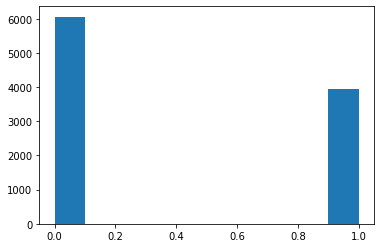

In [64]:
plt.hist(data['Allergic_rhinitis'])

(array([5865.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4135.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

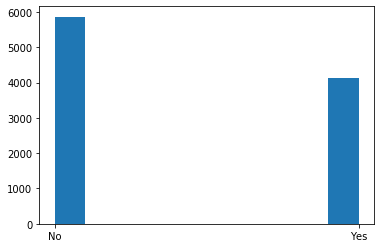

In [65]:
#Reexpression of 'Reflux_esophagitis' data as numeric
plt.hist(data['Reflux_esophagitis'])

In [66]:
data['Reflux_esophagitis'] = data['Reflux_esophagitis'].astype(str)
data['Reflux_esophagitis'].replace(('Yes','No'), (1,0), inplace=True)

(array([5865.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4135.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

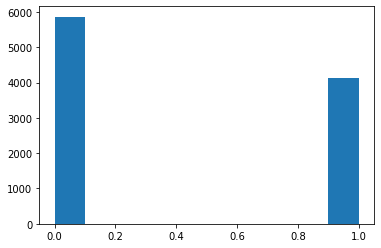

In [67]:
plt.hist(data['Reflux_esophagitis'])

(array([2893.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        7107.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

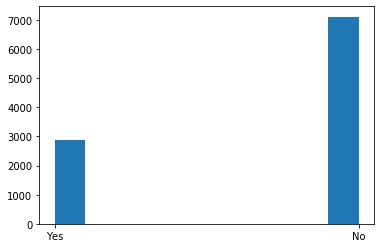

In [68]:
#Reexpression of 'Asthma' data as numeric.
plt.hist(data['Asthma'])

In [69]:
data['Asthma'] = data['Asthma'].astype(str)
data['Asthma'].replace(('Yes','No'), (1,0), inplace=True)

(array([7107.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2893.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

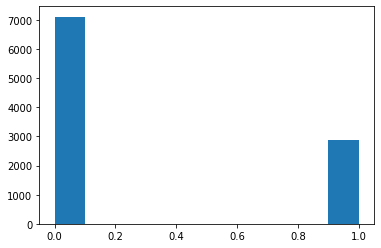

In [70]:
plt.hist(data['Asthma'])

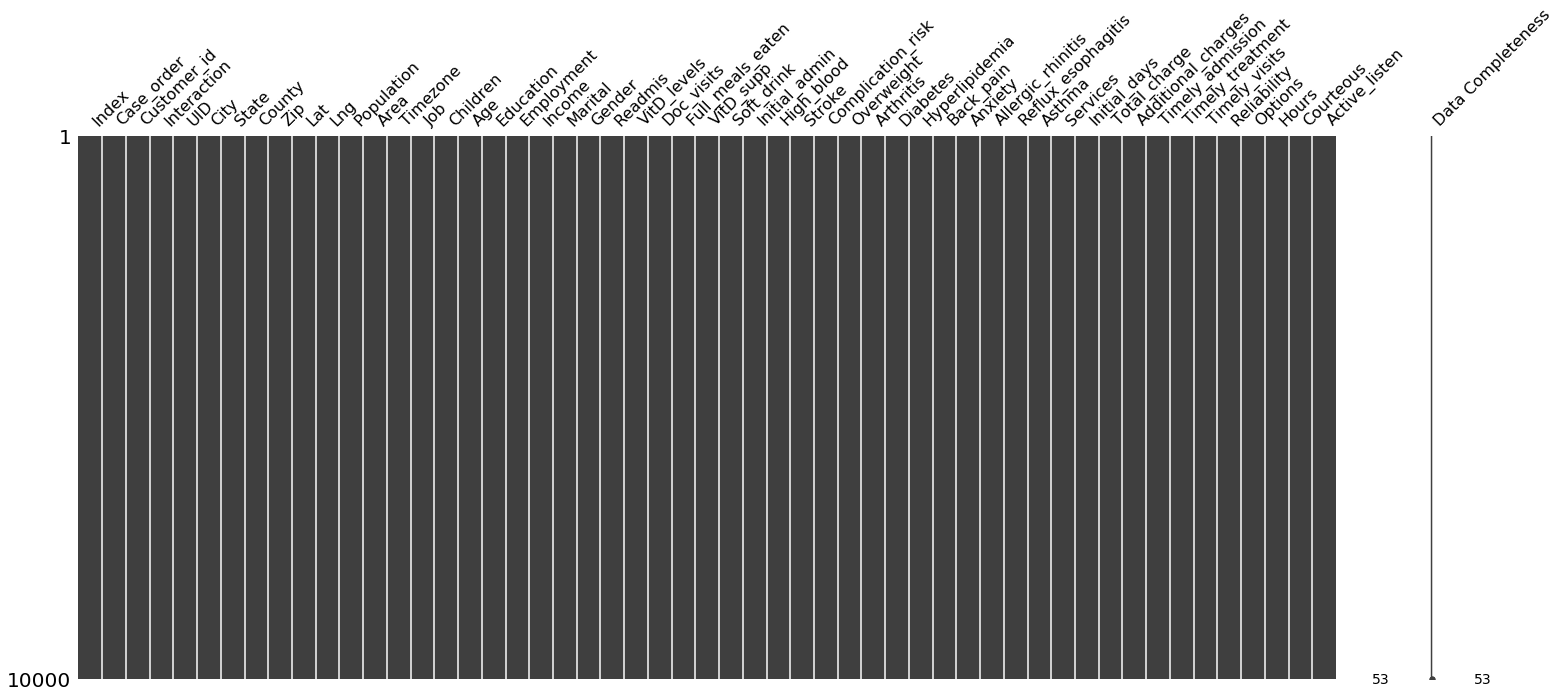

In [71]:
msno.matrix(data, labels=True)

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Index               10000 non-null  int64  
 1   Case_order          10000 non-null  int64  
 2   Customer_id         10000 non-null  object 
 3   Interaction         10000 non-null  object 
 4   UID                 10000 non-null  object 
 5   City                10000 non-null  object 
 6   State               10000 non-null  object 
 7   County              10000 non-null  object 
 8   Zip                 10000 non-null  int64  
 9   Lat                 10000 non-null  float64
 10  Lng                 10000 non-null  float64
 11  Population          10000 non-null  int64  
 12  Area                10000 non-null  object 
 13  Timezone            10000 non-null  object 
 14  Job                 10000 non-null  object 
 15  Children            10000 non-null  float64
 16  Age  

(array([6029.,    0.,  980.,    0.,    0.,  983.,    0., 1017.,    0.,
         991.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

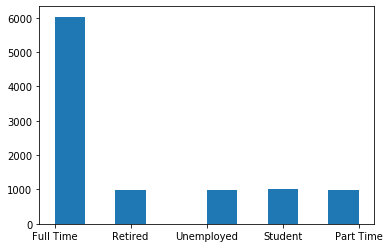

In [73]:
#Reexpress 'Employment' data as numeric.
plt.hist(data['Employment'])

In [74]:
data['Employment'] = data['Employment'].astype(str)
data['Employment'].replace(('Full Time','Retired', 'Unemployed', 'Student', 'Part Time'), (1, 2, 3, 4, 5), inplace=True)

(array([6029.,    0.,  980.,    0.,    0.,  983.,    0., 1017.,    0.,
         991.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

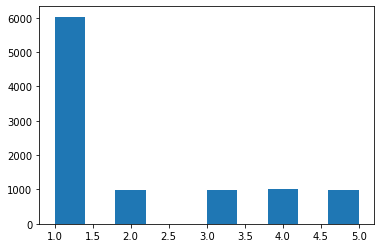

In [75]:
plt.hist(data['Employment'])

(array([1961.,    0., 2023.,    0.,    0., 2045.,    0., 1984.,    0.,
        1987.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

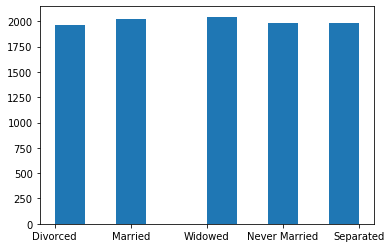

In [76]:
#Reexpress 'Marital' data as numeric
plt.hist(data['Marital'])

In [77]:
data['Marital'] = data['Marital'].astype(str)
data['Marital'].replace(('Divorced','Married', 'Widowed', 'Never Married', 'Separated'), (1, 2, 3, 4, 5), inplace=True)

(array([1961.,    0., 2023.,    0.,    0., 2045.,    0., 1984.,    0.,
        1987.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

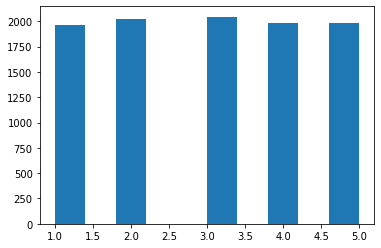

In [78]:
plt.hist(data['Marital'])

(array([4768.,    0.,    0.,    0.,    0., 5018.,    0.,    0.,    0.,
         214.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

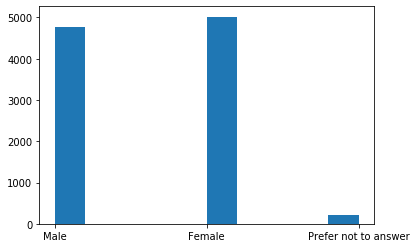

In [79]:
#Reexpress 'Gender' data as numeric
plt.hist(data['Gender'])

In [80]:
data['Gender'] = data['Gender'].astype(str)
data['Gender'].replace(('Male','Female', 'Prefer not to answer'), (1, 2, 3), inplace=True)

(array([4768.,    0.,    0.,    0.,    0., 5018.,    0.,    0.,    0.,
         214.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

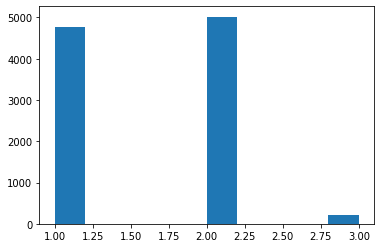

In [81]:
plt.hist(data['Gender'])

(array([5060.,    0.,    0.,    0.,    0., 2504.,    0.,    0.,    0.,
        2436.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

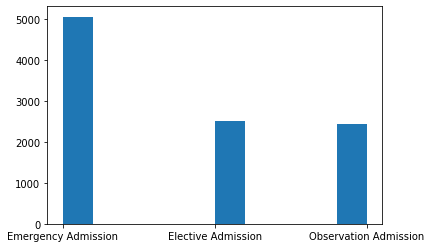

In [82]:
#Reexpress 'Initial_admin' as numeric data
plt.hist(data['Initial_admin'])

In [83]:
data['Initial_admin'] = data['Initial_admin'].astype(str)
data['Initial_admin'].replace(('Emergency Admission','Elective Admission', 'Observation Admission'), (1, 2, 3), inplace=True)

(array([5060.,    0.,    0.,    0.,    0., 2504.,    0.,    0.,    0.,
        2436.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

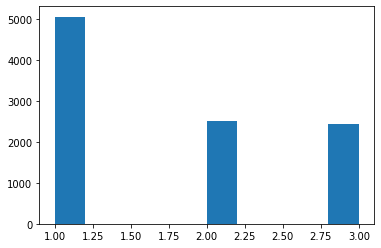

In [84]:
plt.hist(data['Initial_admin'])

(array([4517.,    0.,    0.,    0.,    0., 3358.,    0.,    0.,    0.,
        2125.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

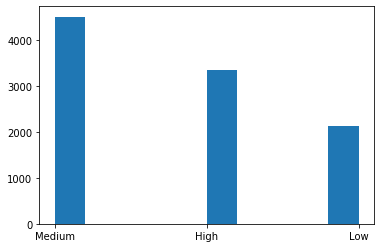

In [85]:
#Reexpress 'Complication_risk' data as numeric
plt.hist(data['Complication_risk'])

In [86]:
data['Complication_risk'] = data['Complication_risk'].astype(str)
data['Complication_risk'].replace(('Low','Medium', 'High'), (1, 2, 3), inplace=True)

(array([2125.,    0.,    0.,    0.,    0., 4517.,    0.,    0.,    0.,
        3358.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

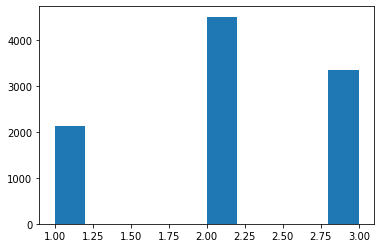

In [87]:
plt.hist(data['Complication_risk'])

(array([5265.,    0.,    0., 3130.,    0.,    0., 1225.,    0.,    0.,
         380.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

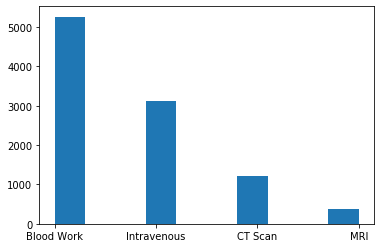

In [88]:
#Reexpress 'Services' data as numeric
plt.hist(data['Services'])

In [89]:
data['Services'] = data['Services'].astype(str)
data['Services'].replace(('Blood Work','Intravenous', 'CT Scan', 'MRI'), (1, 2, 3, 4), inplace=True)

(array([5265.,    0.,    0., 3130.,    0.,    0., 1225.,    0.,    0.,
         380.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

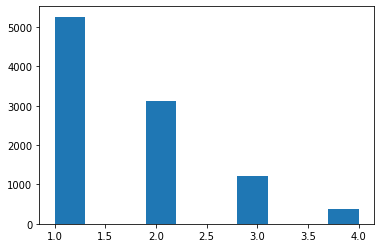

In [90]:
plt.hist(data['Services'])

(array([3328.,    0.,    0.,    0.,    0., 3303.,    0.,    0.,    0.,
        3369.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

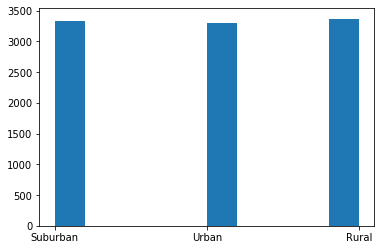

In [91]:
#Reexpress 'Area' data as numeric
plt.hist(data['Area'])

In [92]:
data['Area'] = data['Area'].astype(str)
data['Area'].replace(('Suburban','Urban', 'Rural'), (1, 2, 3), inplace=True)

(array([3328.,    0.,    0.,    0.,    0., 3303.,    0.,    0.,    0.,
        3369.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

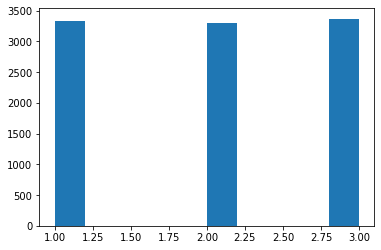

In [93]:
plt.hist(data['Area'])

(array([2126.,  389., 2444., 1724.,  701.,  552.,  832.,   94.,  797.,
         341.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <a list of 10 Patch objects>)

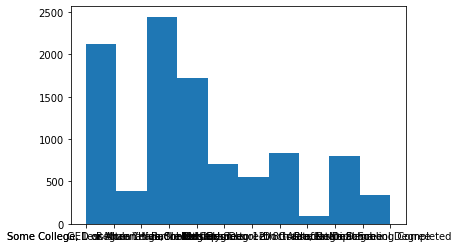

In [94]:
#Reexpress 'Education' data as numeric
plt.hist(data['Education'])

In [95]:
data['Education'] = data['Education'].astype(str)
data['Education'].replace(('No Schooling Completed', 'Nursery School to 8th Grade', '9th Grade to 12th Grade, No Diploma', 'GED or Alternative Credential', 'Regular High School Diploma', 'Some College, Less than 1 Year', 'Some College, 1 or More Years, No Degree', 'Professional School Degree', 'Associate\'s Degree', 'Bachelor\'s Degree', 'Master\'s Degree', 'Doctorate Degree'), (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11), inplace=True)

(array([ 685.,  832.,  389., 2444.,  642., 1484.,  208.,  797., 1724.,
         795.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <a list of 10 Patch objects>)

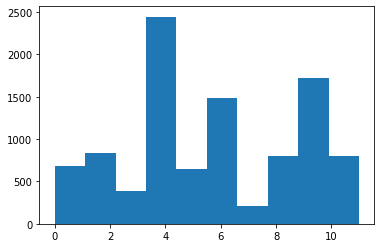

In [96]:
plt.hist(data['Education'])

In [97]:
data['Education'].unique()

array([ 5,  6,  3,  4,  9, 10,  1,  2, 11,  8,  7,  0], dtype=int64)

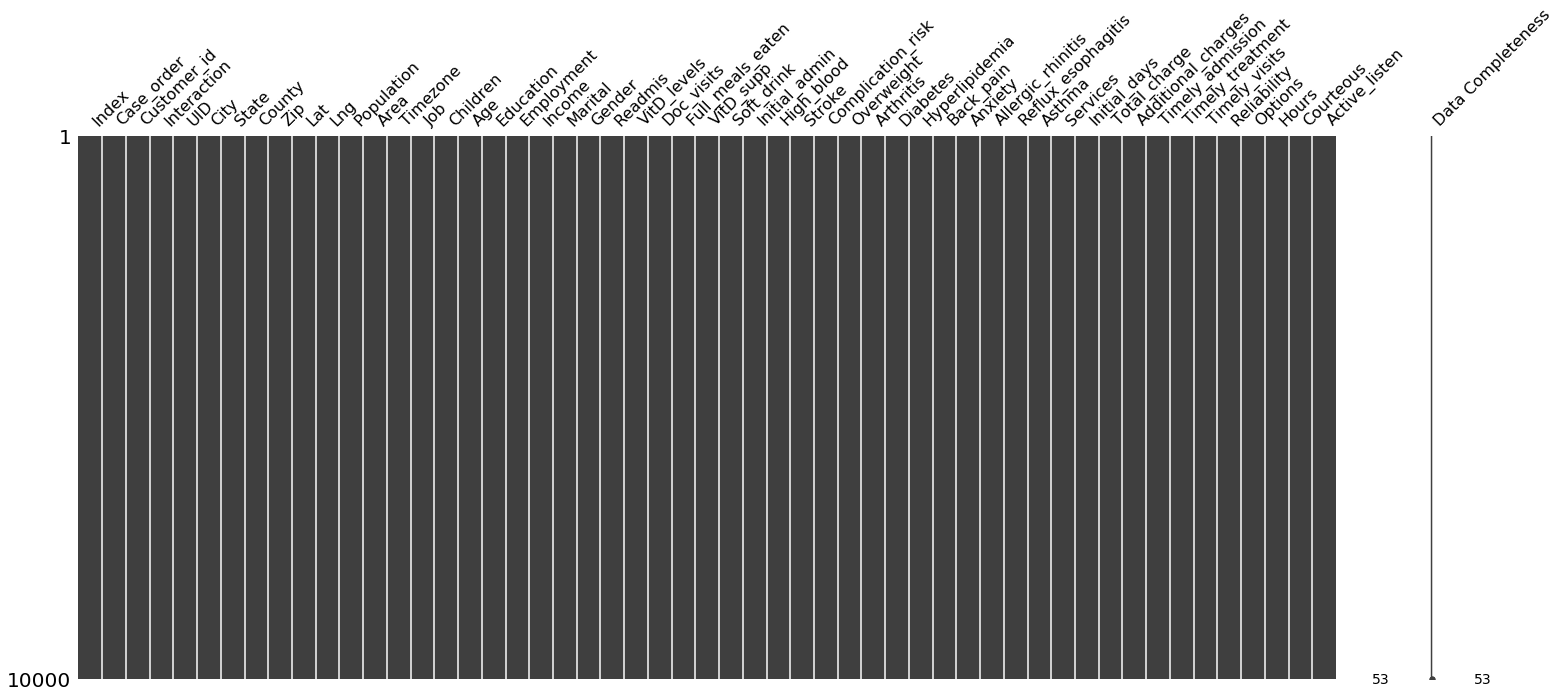

In [98]:
msno.matrix(data, labels=True)

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Index               10000 non-null  int64  
 1   Case_order          10000 non-null  int64  
 2   Customer_id         10000 non-null  object 
 3   Interaction         10000 non-null  object 
 4   UID                 10000 non-null  object 
 5   City                10000 non-null  object 
 6   State               10000 non-null  object 
 7   County              10000 non-null  object 
 8   Zip                 10000 non-null  int64  
 9   Lat                 10000 non-null  float64
 10  Lng                 10000 non-null  float64
 11  Population          10000 non-null  int64  
 12  Area                10000 non-null  int64  
 13  Timezone            10000 non-null  object 
 14  Job                 10000 non-null  object 
 15  Children            10000 non-null  float64
 16  Age  

In [100]:
data.to_csv('C:/Users/ericy/Desktop/D206_clean.csv')

In [101]:
#Round 'Income' case entries
data['Income'].round()
data['Income'] = data['Income'].astype('int64')


In [102]:
data['Income'].head()

0    86575
1    46805
2    14370
3    39741
4     1209
Name: Income, dtype: int64

In [103]:
#Round 'VitD_levels' case entries
data['VitD_levels'].round()
data['VitD_levels'] = data['VitD_levels'].astype('int64')
data['VitD_levels'].head()

0    17
1    18
2    17
3    17
4    16
Name: VitD_levels, dtype: int64

In [104]:
#Round 'Initial_days' case entries
data['Initial_days'].round()
data['Initial_days'] = data['Initial_days'].astype('int64')
data['Initial_days'].head()

0    10
1    15
2     4
3     1
4     1
Name: Initial_days, dtype: int64

In [105]:
#Round 'Total_charge' case entries
data['Total_charge'].round()
data['Total_charge'] = data['Total_charge'].astype('int64')
data['Total_charge'].head()

0    3191
1    4214
2    2177
3    2465
4    1885
Name: Total_charge, dtype: int64

In [106]:
#Round 'Additional_charges' case entries
data['Additional_charges'].round()
data['Additional_charges'] = data['Additional_charges'].astype('int64')
data['Additional_charges'].head()

0    17939
1    17612
2    17505
3    12993
4     3716
Name: Additional_charges, dtype: int64

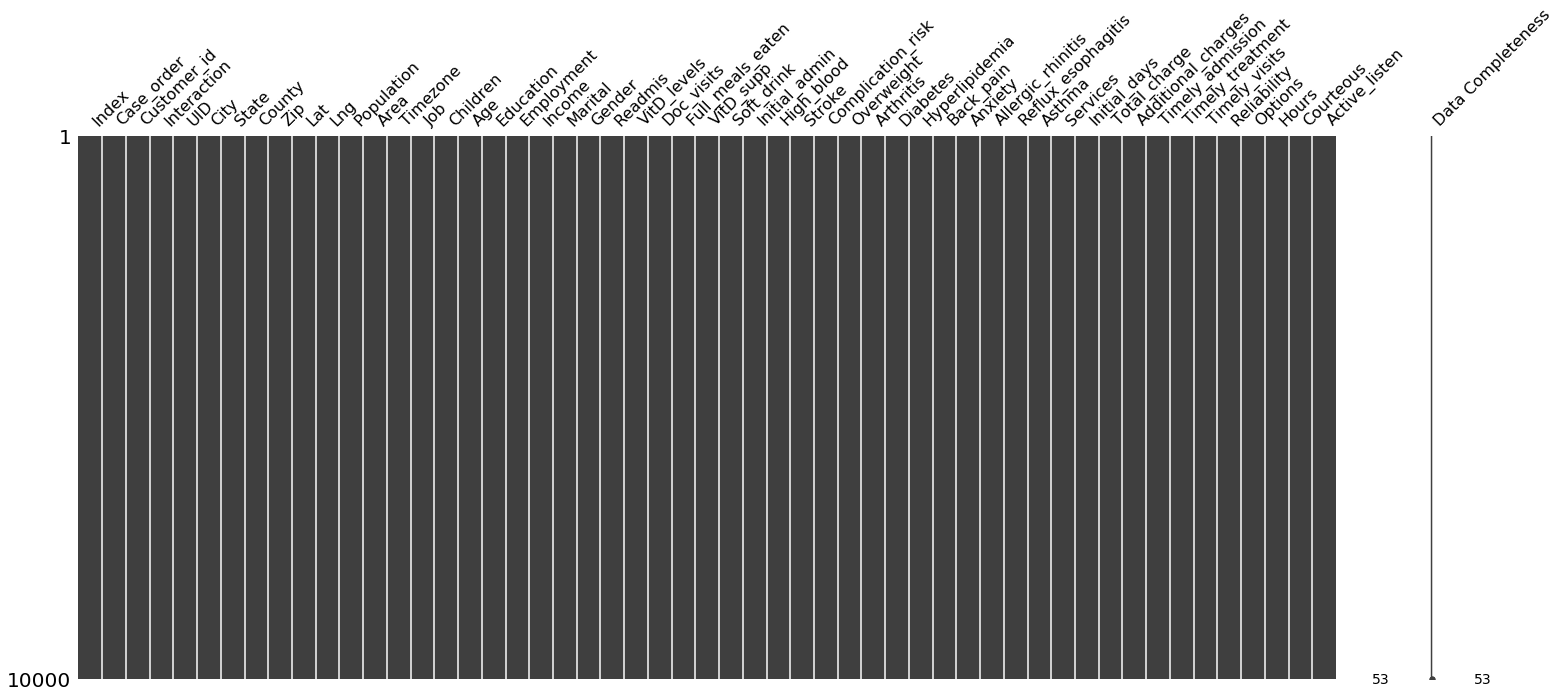

In [107]:
msno.matrix(data, labels=True)

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Index               10000 non-null  int64  
 1   Case_order          10000 non-null  int64  
 2   Customer_id         10000 non-null  object 
 3   Interaction         10000 non-null  object 
 4   UID                 10000 non-null  object 
 5   City                10000 non-null  object 
 6   State               10000 non-null  object 
 7   County              10000 non-null  object 
 8   Zip                 10000 non-null  int64  
 9   Lat                 10000 non-null  float64
 10  Lng                 10000 non-null  float64
 11  Population          10000 non-null  int64  
 12  Area                10000 non-null  int64  
 13  Timezone            10000 non-null  object 
 14  Job                 10000 non-null  object 
 15  Children            10000 non-null  float64
 16  Age  

In [109]:
data.to_csv('C:/Users/ericy/Desktop/D206_clean.csv')

In [110]:
#Convert 'Children', 'Age', 'Education', 'Readmis', 'Soft_drink', 'High_blood', 'Stroke',
#'Overweight', 'Arthritis', 'Diabetes', and 'Anxiety' to int64 datatype
data['Children'] = data['Children'].astype('int64')
data['Age'] = data['Age'].astype('int64')
data['Education'] = data['Education'].astype('int64')
data['Readmis'] = data['Readmis'].astype('int64')
data['Soft_drink'] = data['Soft_drink'].astype('int64')
data['High_blood'] = data['High_blood'].astype('int64')
data['Stroke'] = data['Stroke'].astype('int64')
data['Overweight'] = data['Overweight'].astype('int64')
data['Arthritis'] = data['Arthritis'].astype('int64')
data['Diabetes'] = data['Diabetes'].astype('int64')
data['Anxiety'] = data['Anxiety'].astype('int64')


In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Index               10000 non-null  int64  
 1   Case_order          10000 non-null  int64  
 2   Customer_id         10000 non-null  object 
 3   Interaction         10000 non-null  object 
 4   UID                 10000 non-null  object 
 5   City                10000 non-null  object 
 6   State               10000 non-null  object 
 7   County              10000 non-null  object 
 8   Zip                 10000 non-null  int64  
 9   Lat                 10000 non-null  float64
 10  Lng                 10000 non-null  float64
 11  Population          10000 non-null  int64  
 12  Area                10000 non-null  int64  
 13  Timezone            10000 non-null  object 
 14  Job                 10000 non-null  object 
 15  Children            10000 non-null  int64  
 16  Age  

In [112]:
data.to_csv('C:/Users/ericy/Desktop/D206_clean.csv', index=False)
data.to_csv('C:/Users/ericy/Desktop/data_z.csv', index=False)
data.to_csv('C:/Users/ericy/Desktop/PCA_Ready.csv', index=False)

In [113]:
#Assign variable to dataset for calculating z scores
#Calculate Z-Scores for all quantitative variables
dataz = pd.read_csv('C:/Users/ericy/Desktop/data_z.csv')
dataz.info()
dataz['Age_z'] = stats.zscore(data['Age'])
Agez = dataz.query('Age_z > 3 | Age_z < -3')
Agez.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Index               10000 non-null  int64  
 1   Case_order          10000 non-null  int64  
 2   Customer_id         10000 non-null  object 
 3   Interaction         10000 non-null  object 
 4   UID                 10000 non-null  object 
 5   City                10000 non-null  object 
 6   State               10000 non-null  object 
 7   County              10000 non-null  object 
 8   Zip                 10000 non-null  int64  
 9   Lat                 10000 non-null  float64
 10  Lng                 10000 non-null  float64
 11  Population          10000 non-null  int64  
 12  Area                10000 non-null  int64  
 13  Timezone            10000 non-null  object 
 14  Job                 10000 non-null  object 
 15  Children            10000 non-null  int64  
 16  Age  

,Index,Case_order,Customer_id,Interaction,UID,City,State,County,Zip,Lat,...,Additional_charges,Timely_admission,Timely_treatment,Timely_visits,Reliability,Options,Hours,Courteous,Active_listen,Age_z


In [114]:
dataz['Children_z'] = stats.zscore(dataz['Children'])
Childrenz = dataz.query('Children_z > 3 | Children_z < -3')
Childrenz.sort_values(['Children_z'], ascending = False)

,Index,Case_order,Customer_id,Interaction,UID,City,State,County,Zip,Lat,...,Timely_admission,Timely_treatment,Timely_visits,Reliability,Options,Hours,Courteous,Active_listen,Age_z,Children_z
16,16,17,O377757,7faf0261-bc66-489a-a8ba-fec333485254,728333940561457a9feba1e1dc763258,Blythe,CA,Riverside,92225,33.74647,...,5,4,5,2,4,3,4,3,-0.453318,4.270496
1093,1093,1094,U798396,ded17fc4-27d2-4fce-a7e4-c3b27427ff0b,9d56a350bcbd02ad66629ce06080ef32,Rock Hill,SC,York,29730,34.88671,...,3,5,4,4,4,2,2,3,-1.323950,4.270496
6484,6484,6485,A961890,00730262-8847-4a35-9a79-f8d247ee57e8,ef304b3a546a70fb216abde377fbe688,Loomis,CA,Placer,95650,38.81284,...,5,4,5,3,4,5,5,4,0.804260,4.270496
2124,2124,2125,T948257,17f13f8d-8c16-47eb-9e6c-c5635f97dcc8,672cf906ec22dbec40674cb78f837e44,Mullen,NE,Hooker,69152,42.10925,...,4,3,4,3,3,3,4,3,-1.130476,4.270496
2121,2121,2122,E859932,2d86af54-e54e-485f-8d06-01de27a966d9,432f2a96712dfd4d2f56965c4805bb68,Madison,AR,St. Francis,72359,35.02289,...,5,5,6,3,4,4,3,4,0.755892,4.270496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6112,6112,6113,Z417502,05902a2c-b76f-4ab6-b46d-857c58cf6da7,30695977947a77889822d153007e8eb2,Chicago,IL,Cook,60653,41.81925,...,3,4,3,4,3,5,4,3,0.078734,3.227130
6174,6174,6175,M717683,14ea5131-9ce6-4417-8e3f-99467287ff45,47525dc30f2e86cabbaad3e3bd4a7406,Plainview,AR,Yell,72857,34.85777,...,4,3,3,5,4,4,4,4,1.433049,3.227130
2524,2524,2525,A541545,78c32463-77cd-4121-8d1c-e6764c6757fa,1c3e490f7ad5a81bf8f8ba7937e2221b,Lonsdale,MN,Rice,55046,44.44867,...,3,3,3,2,3,3,3,4,1.433049,3.227130
2487,2487,2488,L515011,e5b1b81c-917f-434f-84ae-ed6ffb281020,fced486b7771e55cfb7d800cb0e0fc04,Beavercreek,OR,Clackamas,97004,45.25115,...,2,2,2,4,3,3,3,5,1.481418,3.227130


In [115]:
dataz['Income_z'] = stats.zscore(dataz['Income'])
Incomez = dataz.query('Income_z > 3 | Income_z < -3')
Incomez.sort_values(['Income_z'], ascending = False)

,Index,Case_order,Customer_id,Interaction,UID,City,State,County,Zip,Lat,...,Timely_treatment,Timely_visits,Reliability,Options,Hours,Courteous,Active_listen,Age_z,Children_z,Income_z
8386,8386,8387,C817840,41770631-ff8b-4e71-9631-f369b04d2125,f81e41a00a41c04266e666361ad49a33,Phoenix,AZ,Maricopa,85044,33.34239,...,3,4,1,4,4,3,3,-1.662529,0.097033,6.723909
841,841,842,F304162,cbd20767-266b-470b-9bd7-9b8aab96da38,3424165edc18b296b6ec24d69101a2a9,Galloway,WV,Barbour,26349,39.23570,...,3,4,5,4,2,2,4,1.433049,0.618716,6.615809
8598,8598,8599,C730234,bb1cdec6-187d-40ac-bcb2-1544f5bb4b1d,609d3ae46250dffa60021c1f62169869,Haywood,VA,Madison,22722,38.46162,...,5,5,5,3,4,4,4,1.094471,-0.424650,6.585140
6406,6406,6407,J423842,fe003dd7-d9b2-4cc0-b446-fc0c48cdabea,b481a4d89ab6871d664e7f917393a5ba,Scranton,PA,Lackawanna,18504,41.42553,...,4,4,4,3,3,4,4,0.417313,3.227130,6.341584
1778,1778,1779,T848406,3c57ca24-c58c-45b0-a96f-928187a615d0,73fffc542bdeb8f39051413f55972023,Mowrystown,OH,Highland,45155,39.03989,...,3,5,5,3,3,3,6,-1.178844,-0.946333,6.337631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7697,7697,7698,S906499,2d880cc6-37c3-4b7c-90d7-6fc3074d19eb,c4a72a9475c3d22d40ae6d483e8a5867,Lynnfield,MA,Essex,1940,42.53456,...,5,3,3,5,3,3,4,1.046102,0.097033,3.027650
3702,3702,3703,D875126,736613d8-eb00-488f-8e93-2c3f7d939c0f,0e9eb923d8ddf8ecca0db017fa1e99d8,Byron,MN,Olmsted,55920,44.01384,...,3,4,4,4,2,3,5,1.481418,1.140399,3.026492
86,86,87,E681129,78216a6f-87fe-45a8-8e76-a8abbe2adff2,ad555647d06822a4a1259340c2e21c5f,Caroleen,NC,Rutherford,28019,35.28035,...,4,4,2,3,4,3,3,-1.614160,-0.424650,3.021101
3017,3017,3018,Y624229,b920591f-01cb-4320-af69-d62ca61ae8e2,886eb2d72c29fe788232f6b36bd37f08,Sulphur Springs,AR,Benton,72768,36.47694,...,3,2,5,3,4,4,3,0.223839,-0.946333,3.019384


In [116]:
dataz['VitD_levels_z'] = stats.zscore(dataz['VitD_levels'])
VitD_levels_z = dataz.query('VitD_levels_z > 3 | VitD_levels_z < -3')
VitD_levels_z.sort_values(['VitD_levels_z'], ascending = False)

,Index,Case_order,Customer_id,Interaction,UID,City,State,County,Zip,Lat,...,Timely_visits,Reliability,Options,Hours,Courteous,Active_listen,Age_z,Children_z,Income_z,VitD_levels_z
1963,1963,1964,J288779,d643d57b-cebb-4556-ac38-8b339b85175d,7305ac02547eb73b8a5e30855b602e99,Jean,NV,Clark,89019,35.76620,...,2,3,3,3,3,3,-0.598424,-0.424650,-0.073878,5.068567
3473,3473,3474,Y739652,6dbae289-4c4d-4157-9fbf-4bc4665c12fd,0f46805163c147c5bc70ef76b46be56a,Concord,CA,Contra Costa,94521,37.95603,...,3,2,3,3,3,4,0.127102,-0.424650,-0.445261,4.919856
2615,2615,2616,S997798,8888fd85-4442-48f6-924d-858c30e733d0,4876750cae50b72e92b19e2213b1371c,Harris,MO,Sullivan,64645,40.29741,...,3,4,4,3,4,3,-0.743529,0.097033,-0.196873,4.919856
7157,7157,7158,L397900,85cc282c-0b16-404b-8f15-6b7ac633c2d6,2b091704732658b36d1a37c3674e69a0,Jobstown,NJ,Burlington,8041,40.03788,...,2,4,4,3,4,4,0.417313,0.097033,-1.055247,4.919856
1306,1306,1307,B77596,e19f375b-b1ea-44b9-a0e3-bcf3bf4b4bc1,bcd4395e7916ffa8e6659f9c563f56ea,Holualoa,HI,Hawaii,96725,19.62925,...,6,2,5,3,5,4,-1.130476,0.618716,1.866898,4.919856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786,786,787,U179768,1ca91d4f-9f12-4095-907a-3c81afb93207,266a7c39f532ce5455c4ac68a615d003,Hatteras,NC,Dare,27943,35.21097,...,3,3,4,5,3,4,-1.082108,1.140399,-0.196873,3.284033
7270,7270,7271,M212963,b9e0709b-a602-41a5-b3b4-229576f57952,758d7f97dea2ebe1c585733bd100e86f,Augusta,GA,Richmond,30905,33.41474,...,4,4,3,4,5,4,-0.259845,0.618716,1.076451,3.284033
5688,5688,5689,Q71266,2179cd1f-a3b0-4ee7-a53a-35a3632bf291,ba620f7005481bb1641cbac29720efea,Duarte,CA,Los Angeles,91010,34.14074,...,3,3,4,3,3,4,0.707523,0.618716,2.491900,3.284033
2946,2946,2947,T519902,50542ca6-d2bb-4ead-a3c1-d8194eaab696,23bc2fc77e42f0a89e7bbef583f9cd9d,Dayton,WA,Columbia,99328,46.25660,...,3,4,3,5,4,3,-0.211476,0.618716,-0.196873,3.284033


In [117]:
dataz['Doc_visits_z'] = stats.zscore(dataz['Doc_visits'])
Doc_visits_z = dataz.query('Doc_visits_z > 3 | Doc_visits_z < -3')
Doc_visits_z.sort_values(['Doc_visits_z'], ascending = False)

,Index,Case_order,Customer_id,Interaction,UID,City,State,County,Zip,Lat,...,Reliability,Options,Hours,Courteous,Active_listen,Age_z,Children_z,Income_z,VitD_levels_z,Doc_visits_z
962,962,963,A518996,a38c4ad7-323f-41f2-9a08-ff17743aaa53,4112b686f622313e4d247da0b9a2afb4,Uvalde,TX,Uvalde,78801,29.35664,...,3,4,4,3,2,1.239576,1.140399,3.976753,0.012388,3.813587
2766,2766,2767,N924859,5a334d2f-a78d-4165-aa83-d368bb82fa48,a18d1b5abef353e496b4d25926c0d213,Walton,OR,Lane,97490,44.00425,...,3,3,4,2,3,0.707523,0.097033,-1.044505,-0.285035,3.813587
5645,5645,5646,H849940,d5b2f306-7c65-4ad0-8d9b-3b144bd20c34,e5e3073cdab4a0e7ba03a174660cb5b2,Faber,VA,Nelson,22938,37.86065,...,3,3,5,5,5,-1.710897,3.227130,1.749373,-0.285035,-3.836921
5756,5756,5757,Q856766,abf1c636-143b-4f87-a663-82c1ac92bbd2,5046bbcc46fbcccf4f6b76c7e5b71082,Toronto,OH,Jefferson,43964,40.48617,...,2,5,3,1,2,0.659155,0.618716,-0.196873,-0.136324,-3.836921
6017,6017,6018,Z448538,a44eb330-7119-4c47-a0c0-356b2d481587,42e4405346a43a9c60a2acf63718f235,Collins,WI,Manitowoc,54207,44.08782,...,3,3,5,3,4,-1.372318,0.097033,-0.825988,-0.136324,-3.836921
6498,6498,6499,D695903,7e305136-22ea-4d2d-a92d-39132c1bf66b,994f0adf59f7a7d9bb53bb296058be3b,Douglas,OK,Garfield,73733,36.25360,...,4,2,3,3,3,0.514050,-0.424650,-0.278458,-0.582457,-3.836921
6942,6942,6943,W120936,2d981e21-86cd-4880-b731-a5c0d5a2c2bb,2fd0a3063b109969d378e61c19c081c0,Noonan,ND,Divide,58765,48.87743,...,3,4,4,4,4,0.030366,-0.946333,0.658865,-0.582457,-3.836921
7143,7143,7144,K252805,dc0772b4-e146-492f-8537-8c02679d553f,bf9248b12adbe35b728debdf7f00b68e,El Paso,TX,El Paso,79907,31.70750,...,4,3,4,2,2,1.529786,-0.424650,-0.912524,-0.582457,-3.836921


In [118]:
dataz['Full_mealz'] = stats.zscore(dataz['Full_meals_eaten'])
Full_mealz = dataz.query('Full_mealz > 3 | Full_mealz < -3')
Full_mealz.sort_values(['Full_mealz'], ascending = False)

,Index,Case_order,Customer_id,Interaction,UID,City,State,County,Zip,Lat,...,Options,Hours,Courteous,Active_listen,Age_z,Children_z,Income_z,VitD_levels_z,Doc_visits_z,Full_mealz
958,958,959,Y657696,c7a8a8b7-5d61-4d95-872f-58f3bb589c09,30703ca82ae5ed6da3addcd421777c38,Sebastopol,CA,Sonoma,95472,38.39817,...,2,4,5,4,0.320576,3.227130,-0.724117,0.012388,-0.011667,5.950600
4709,4709,4710,F767195,7da332b0-bc0f-4486-a973-c960376154aa,bda40730190467bcfc2b4ce70b727a71,Leopold,MO,Bollinger,63760,37.24007,...,3,4,3,4,0.900997,-0.424650,-0.196873,-0.582457,-0.967981,5.950600
9986,9986,9987,Z630066,1ed0ed27-4965-4252-85ea-dd7ed73bd51a,f132eca4af3b1c955d89a213096ef88a,Perry,IA,Dallas,50220,41.83609,...,4,4,4,3,-0.453318,-0.424650,1.825806,-0.285035,0.944647,4.958602
7217,7217,7218,M529189,73802f3c-f978-4b67-ba2c-844140ac7e41,b200ab915ceeee74bceab2dc0ad39121,Ashton,IA,Osceola,51232,43.30166,...,4,4,3,4,1.287944,0.097033,-0.196873,-0.285035,-0.011667,4.958602
6068,6068,6069,Z447871,56d5bab6-25c0-4c30-a3f9-822ff27def3e,2db6d1a15351eaa51b4370872cafab51,Constableville,NY,Lewis,13325,43.57631,...,4,1,3,3,1.287944,-0.424650,-1.385179,-0.731168,-0.967981,4.958602
1231,1231,1232,J394932,e625f515-a366-4b95-8e88-9dc3afda79d8,ea252a0d3bcd2272a60a658b7cf21b29,Bay Shore,NY,Suffolk,11706,40.72171,...,3,4,3,4,-1.372318,0.618716,0.028113,-0.433746,-0.967981,4.958602
2184,2184,2185,H40270,30bfc529-4c99-4244-b3fa-b1828e591622,e8b301a00be4e22f809745e50b684b28,Waynesville,GA,Brantley,31566,31.19036,...,3,4,4,5,1.336313,-0.424650,2.050873,-0.433746,0.944647,4.958602
8144,8144,8145,G557244,25861106-d9bf-4744-8f7f-952bdef14ace,eff4a060f579f85142c6ea7ca3884435,Mangham,LA,Richland,71259,32.27255,...,4,4,4,4,1.626523,-0.424650,0.685980,-0.731168,-0.011667,4.958602
6083,6083,6084,T927706,1d3b5fc2-3a3b-4138-a2f8-b65e93d26125,cb97fffaa14fa2a4499cdaf32ae81f22,Highland,MI,Oakland,48356,42.65507,...,4,2,3,5,0.272208,-0.946333,-1.119341,-0.433746,-0.967981,3.966603
6694,6694,6695,C327638,e9cfdc20-d85d-4c1f-9e35-a0714c341760,64b2d0f9910d479999267b0ecc142da2,Davison,MI,Genesee,48423,43.03981,...,3,4,4,3,1.142839,-0.946333,5.303509,-0.136324,-0.011667,3.966603


In [119]:
dataz['VitD_suppz'] = stats.zscore(dataz['VitD_supp'])
VitD_suppz = dataz.query('VitD_suppz > 3 | VitD_suppz < -3')
VitD_suppz.sort_values(['VitD_suppz'], ascending = False)

,Index,Case_order,Customer_id,Interaction,UID,City,State,County,Zip,Lat,...,Hours,Courteous,Active_listen,Age_z,Children_z,Income_z,VitD_levels_z,Doc_visits_z,Full_mealz,VitD_suppz
3131,3131,3132,A693543,c2eef231-ba8b-4f2a-b7bb-5722189fbe4b,19716f3f690b579b5dcdb771550f9b5c,Washington,KS,Washington,66968,39.82744,...,4,4,5,0.562418,-0.946333,-0.061977,0.161099,-0.967981,-0.001389,7.321074
2715,2715,2716,P60898,f66b928a-6de9-4043-b2d2-8cf0bfac0b34,52e8f2a6e67c326ce495e89cf8e3391a,Bainbridge,IN,Putnam,46105,39.76418,...,2,3,3,-0.259845,0.618716,-0.454965,-0.731168,0.944647,-0.993387,5.729917
9091,9091,9092,A771264,4676ed64-981d-48c8-bf78-6706c592e4fd,f77af82fc41b30951e69e437feb63ca5,Rio Nido,CA,Sonoma,95471,38.52404,...,4,4,3,-0.018003,0.097033,-1.270809,-0.433746,0.944647,0.990609,5.729917
1342,1342,1343,X97640,c6680d61-0228-44dc-bac6-7f71492b5daf,15fc59be69381309db87a023bce971cd,Franklin Square,NY,Nassau,11010,40.70060,...,3,4,4,1.384681,-0.424650,-0.196873,-0.285035,-0.967981,-0.993387,5.729917
2533,2533,2534,H623137,7dffab81-3be0-4a66-8aad-4d04a9e08ed9,c7b63686ec434c9059203bb28fe3cea1,Lonsdale,MN,Rice,55046,44.44867,...,3,4,4,0.127102,1.140399,-0.696324,0.458521,-0.967981,-0.001389,5.729917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4398,4398,4399,P241002,c43abb2f-d03f-4f94-b85c-b94f9b87ba8e,1a1d72d68cbe08b21e7a2e69b0db05a6,Honolulu,HI,Honolulu,96816,21.29278,...,4,2,5,0.610787,-0.424650,-0.196873,-0.285035,-0.967981,1.982607,4.138759
4406,4406,4407,Y884211,6559cede-c035-452a-a0cf-41f6ea72ffda,fd9e9c25844f187a3903254ac48a87b4,Glasco,NY,Ulster,12432,42.04431,...,4,4,4,0.562418,-0.424650,-0.196873,0.458521,1.900960,-0.001389,4.138759
4567,4567,4568,M822122,3824bf42-5578-4c6a-bddf-e7c653e57fd8,10f56b5cfa41d592fca272b95903a775,Oklahoma City,OK,Oklahoma,73107,35.48157,...,5,4,3,0.078734,-0.424650,-0.196873,-0.433746,-0.967981,-0.993387,4.138759
4844,4844,4845,L06840,07c93832-d655-440e-b039-030796cb9d72,48bbbf13517022e7f004b71473afddcf,Hartford,SD,Minnehaha,57033,43.61914,...,4,3,4,0.175471,-0.424650,0.922827,0.012388,-0.967981,1.982607,4.138759


In [120]:
dataz['Initial_days_z'] = stats.zscore(dataz['Initial_days'])
Initial_days_z = dataz.query('Initial_days_z > 3 | Initial_days_z < -3')
Initial_days_z.sort_values(['Initial_days_z'], ascending = False)

,Index,Case_order,Customer_id,Interaction,UID,City,State,County,Zip,Lat,...,Courteous,Active_listen,Age_z,Children_z,Income_z,VitD_levels_z,Doc_visits_z,Full_mealz,VitD_suppz,Initial_days_z


In [121]:
dataz['Total_charge_z'] = stats.zscore(dataz['Total_charge'])
Total_charge_z = dataz.query('Total_charge_z > 3 | Total_charge_z < -3')
Total_charge_z.sort_values(['Total_charge_z'], ascending = False)

,Index,Case_order,Customer_id,Interaction,UID,City,State,County,Zip,Lat,...,Active_listen,Age_z,Children_z,Income_z,VitD_levels_z,Doc_visits_z,Full_mealz,VitD_suppz,Initial_days_z,Total_charge_z
8800,8800,8801,I804892,3fc45464-51e3-4182-ba05-0e960ddff205,815273eb63baa4ef16b596d02cfb92de,Weyanoke,LA,West Feliciana,70787,30.96306,...,4,-1.517423,-0.424650,-0.196873,4.473722,-0.011667,-0.993387,0.956445,1.292742,4.628713
9005,9005,9006,G175531,56066f7f-5a32-4732-965a-9e92af4ffb0b,331b2187466de52359ae522cb8b48f8f,Lampe,MO,Stone,65681,36.55435,...,5,0.900997,0.097033,-0.196873,4.325011,-0.967981,-0.993387,-0.634713,1.178828,4.376743
5244,5244,5245,Y654860,11e8adb4-b54b-4672-b122-16b2efd33943,00a99d284dcb8bafd8bae0ee83314e77,Elko,GA,Houston,31025,32.34009,...,5,1.626523,-0.424650,-0.196873,4.027589,-0.011667,0.990609,-0.634713,1.330714,4.369045
5453,5453,5454,N354417,3af75e11-a617-493d-aef8-c799d51ad04b,cf2d345d5c28fd232a947fff963496c7,Elkins,NH,Merrimack,3233,43.42520,...,3,0.078734,-0.424650,-0.513068,4.622433,0.944647,-0.001389,-0.634713,1.254771,4.364603
9159,9159,9160,G163318,d4613a36-798a-4258-9106-e7769c8b9e13,c6f3559b9c756e76dabad184af795a4e,Sunnyvale,TX,Dallas,75182,32.80014,...,4,-0.743529,-0.946333,-0.196873,3.581455,-0.011667,0.990609,-0.634713,1.406657,4.343877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1963,1963,1964,J288779,d643d57b-cebb-4556-ac38-8b339b85175d,7305ac02547eb73b8a5e30855b602e99,Jean,NV,Clark,89019,35.76620,...,3,-0.598424,-0.424650,-0.073878,5.068567,0.944647,-0.993387,-0.634713,-0.340026,3.050570
2999,2999,3000,V552831,0d02edda-1ffe-4388-a126-a9f073151711,ede05577efbb3df8b43befa16a7fb9bf,East Hampstead,NH,Rockingham,3826,42.88621,...,5,0.949365,0.097033,-0.591019,4.176300,-0.011667,-0.001389,-0.634713,-0.643797,3.044352
1847,1847,1848,E836671,9beaf0ae-8bb0-4788-baf7-9b1936f94e5a,7a4b3164770176c1f1df08872cf835d3,Rockville,IN,Parke,47872,39.75343,...,3,0.030366,-0.424650,-0.196873,4.027589,0.944647,-0.993387,0.956445,-0.264083,3.038430
3350,3350,3351,M549619,7f6cd69d-9319-4ac2-b7de-8a011a9525c5,b34915d6185285bb08a88575c22176fe,Towanda,IL,McLean,61776,40.56941,...,6,1.094471,1.140399,-0.339636,3.581455,-1.924294,-0.993387,-0.634713,-0.605825,3.010006


In [122]:
dataz['Additional_charges_z'] = stats.zscore(dataz['Additional_charges'])
Additional_charges_z = dataz.query('Additional_charges_z > 3 | Additional_charges_z < -3')
Additional_charges_z.sort_values(['Additional_charges_z'], ascending = False)

,Index,Case_order,Customer_id,Interaction,UID,City,State,County,Zip,Lat,...,Age_z,Children_z,Income_z,VitD_levels_z,Doc_visits_z,Full_mealz,VitD_suppz,Initial_days_z,Total_charge_z,Additional_charges_z


In [123]:
dataz['Population_z'] = stats.zscore(dataz['Population'])
Population_z = dataz.query('Population_z > 3 | Population_z < -3')
Population_z.sort_values(['Population_z'], ascending = False)

,Index,Case_order,Customer_id,Interaction,UID,City,State,County,Zip,Lat,...,Children_z,Income_z,VitD_levels_z,Doc_visits_z,Full_mealz,VitD_suppz,Initial_days_z,Total_charge_z,Additional_charges_z,Population_z
3024,3024,3025,W840448,7c8ccd98-1619-4492-99a7-b1dd82a713be,02cd4f72ff3415f684ab0847e47feffd,Katy,TX,Harris,77449,29.83556,...,0.097033,-0.196873,-0.136324,2.857274,-0.001389,-0.634713,-1.099453,-0.704404,-0.497233,7.612562
9662,9662,9663,Y770582,7096d230-358f-4244-b05c-70aa3143572f,be3f3df437c3b7b114dc7d24b1a48bfc,Katy,TX,Harris,77449,29.83556,...,-0.946333,-0.196873,-0.136324,-0.967981,2.974605,-0.634713,0.988972,0.499781,1.547011,7.612562
5965,5965,5966,Q787284,121150ca-a1fc-4ba7-aa48-6b7893d0eb0e,8356f8d77795cf648b1f66b4af5f1577,Houston,TX,Harris,77084,29.82641,...,-0.424650,0.317991,-0.582457,-1.924294,-0.993387,-0.634713,0.837086,0.127600,0.722527,6.593000
767,767,768,E632881,e7758807-cc96-4396-a8c5-ff54d26882cc,3008f82476a1bca85459d1b3270a3f8f,Pacoima,CA,Los Angeles,91331,34.25563,...,-0.946333,-0.014616,-0.136324,0.944647,0.990609,-0.634713,-0.529883,-0.310904,-0.913907,6.464762
7686,7686,7687,N145589,9ec70eec-90f7-4ba5-a266-df39435d1cd2,6b797b8b5e27596ef3475e8f57156ead,Pacoima,CA,Los Angeles,91331,34.25563,...,-0.424650,-0.196873,-0.136324,-0.011667,-0.001389,-0.634713,0.875058,0.333381,-0.656199,6.464762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3185,3185,3186,T770780,21bd9512-ce0a-4dad-aae7-ada9c372032c,16c3b9e31c642011e9b28d4e8b091722,Kalispell,MT,Flathead,59901,48.22816,...,0.618716,0.592455,-0.731168,-1.924294,-0.993387,-0.634713,-0.719739,-0.674795,-1.070275,3.014146
3819,3819,3820,R649606,ef1c915b-6122-43e1-a288-81fdb6adc8cb,b298e046e927404b221d90dce841db2a,Kalispell,MT,Flathead,59901,48.22816,...,-0.424650,0.706386,-0.285035,-1.924294,-0.001389,-0.634713,-1.137424,-0.818989,2.038737,3.014146
6796,6796,6797,N911416,f2b9a623-b285-48c4-b0ea-af4d2224a904,e96e51aef8bb754c395bea931debcaeb,Mason,OH,Warren,45040,39.35199,...,0.097033,0.329612,-0.136324,-0.967981,-0.993387,0.956445,1.406657,0.625914,-0.266426,3.004701
964,964,965,U840422,3a1e8fac-deea-4914-87b4-e24a4c37233f,29198a8aad2c9d4f6b66429f61f1cf40,West Chester,PA,Chester,19382,39.92809,...,0.097033,-0.731345,-0.136324,-0.011667,-0.001389,0.956445,-0.947568,-0.903374,-0.464369,3.001531


In [124]:
dataz['Zip_z'] = stats.zscore(dataz['Zip'])
Zip_z = dataz.query('Zip_z > 3 | Zip_z < -3')
Zip_z.sort_values(['Zip_z'], ascending = False)

,Index,Case_order,Customer_id,Interaction,UID,City,State,County,Zip,Lat,...,Income_z,VitD_levels_z,Doc_visits_z,Full_mealz,VitD_suppz,Initial_days_z,Total_charge_z,Additional_charges_z,Population_z,Zip_z


In [125]:
dataz['Lat_z'] = stats.zscore(dataz['Lat'])
Lat_z = dataz.query('Lat_z > 3 | Lat_z < -3')
Lat_z.sort_values(['Lat_z'], ascending = False)

,Index,Case_order,Customer_id,Interaction,UID,City,State,County,Zip,Lat,...,VitD_levels_z,Doc_visits_z,Full_mealz,VitD_suppz,Initial_days_z,Total_charge_z,Additional_charges_z,Population_z,Zip_z,Lat_z
960,960,961,L207471,3f59f2e7-e47d-41f5-9c69-a28435694872,8bd4402de2b9aaa9d398ddc2834f694a,Atqasuk,AK,North Slope,99791,70.56099,...,4.027589,-0.011667,2.974605,-0.634713,-1.251338,2.594892,1.383918,-0.661174,1.806877,5.887651
2282,2282,2283,Z462873,fef4cded-5810-4c43-b849-49ede612900c,292e98f84603bfcbbb8ab779578df8c3,Anchorage,AK,North Slope,99510,70.13850,...,-0.285035,0.944647,-0.993387,-0.634713,-1.023510,-0.969994,0.119526,-0.608219,1.796647,5.809453
4772,4772,4773,S598156,c8f0beab-fbe6-4c6e-96b1-04f973b16a8d,17301ae1a06453897f5863e10637ebd3,Venetie,AK,Yukon-Koyukuk,99781,67.47706,...,0.012388,-0.011667,1.982607,0.956445,-1.137424,-0.829056,-0.214303,-0.662725,1.806513,5.316851
3836,3836,3837,M299873,b88c011f-aa2f-41dc-8633-5072c27a181b,d1b3b5734eca4799a52f296afdc93f81,Ambler,AK,Northwest Arctic,99786,67.17316,...,0.161099,0.944647,-0.993387,-0.634713,-0.643797,-0.463685,-1.186137,-0.652067,1.806695,5.260602
9141,9141,9142,P944084,ec4415b4-b579-490a-a7af-50e195f79efe,9de234b2402c0d5365f66861c99bc292,Bettles Field,AK,Yukon-Koyukuk,99726,67.11836,...,-0.879879,1.900960,2.974605,2.547602,0.077659,-0.097722,-0.416985,-0.667043,1.804510,5.250459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,2013,2014,D675480,30eae952-c151-4c25-9858-10ece8691ca2,62f14eded5c5606c559d00af81a5b057,Guayanilla,PR,Guayanilla,656,18.05280,...,-0.433746,-0.967981,0.990609,0.956445,-0.719739,-0.391440,-0.840844,0.608050,-1.802204,-3.831021
2249,2249,2250,E748476,26b84dcf-ae87-4ea1-8cb7-4a9566877a26,76e8858db9fe7ad330140776f0b4e524,Ponce,PR,Ponce,730,18.03091,...,-0.285035,-0.967981,-0.993387,-0.634713,-0.643797,-0.692264,-0.966183,1.461732,-1.799510,-3.835073
944,944,945,I293001,c5314d07-5984-4572-b727-cb484d00b67e,cdf21e87d6f3fe781ee55d08278d5132,Salinas,PR,Salinas,751,18.01023,...,-0.285035,-0.011667,-0.993387,-0.634713,-0.491911,-0.889458,-0.626698,0.744990,-1.798745,-3.838900
5813,5813,5814,Q527299,3cca64fe-7391-48e4-b7a3-8e0a72d14561,5fa7855743b0bcec3db78d7a13f2e6b7,Boqueron,PR,Cabo Rojo,622,17.99174,...,-0.285035,0.944647,1.982607,-0.634713,1.368685,0.743757,1.862498,-0.228498,-1.803442,-3.842323


In [126]:
dataz['Lng_z'] = stats.zscore(dataz['Lng'])
Lng_z = dataz.query('Lng_z > 3 | Lng_z < -3')
Lng_z.sort_values(['Lng_z'], ascending = False)

,Index,Case_order,Customer_id,Interaction,UID,City,State,County,Zip,Lat,...,Doc_visits_z,Full_mealz,VitD_suppz,Initial_days_z,Total_charge_z,Additional_charges_z,Population_z,Zip_z,Lat_z,Lng_z
378,378,379,U534288,6ceb0811-1275-44aa-8299-a9dd9d5ceab1,84d5d4366a34af0dfab077b864ccf94d,Yakutat,AK,Yakutat,99689,59.52058,...,0.944647,-0.993387,-0.634713,-0.757711,-0.673315,0.540786,-0.627377,1.803163,3.844196,-3.172937
5611,5611,5612,I630264,a25209fd-76aa-44b3-86b8-90c267e4f164,c1fce98dfc966e6d942561864ff64926,Northway,AK,Southeast Fairbanks,99764,63.38147,...,1.900960,-0.993387,0.956445,0.799115,0.321833,-1.376132,-0.642623,1.805894,4.558803,-3.305983
627,627,628,C106587,0bfad232-90c5-4073-8ec7-f5ea37f8dc3c,2f73f44bbab256a40c98564ae3127121,Central,AK,Yukon-Koyukuk,99730,65.61511,...,-0.967981,-0.001389,-0.634713,-0.947568,-0.442663,-0.755247,-0.668932,1.804656,4.972225,-3.551948
4772,4772,4773,S598156,c8f0beab-fbe6-4c6e-96b1-04f973b16a8d,17301ae1a06453897f5863e10637ebd3,Venetie,AK,Yukon-Koyukuk,99781,67.47706,...,-0.011667,1.982607,0.956445,-1.137424,-0.829056,-0.214303,-0.662725,1.806513,5.316851,-3.602468
6760,6760,6761,I277334,e09b15f3-c030-4fc2-a836-683d7903c01a,f38746b1cc1d220ec70e086bcde4fb6f,Cordova,AK,Valdez-Cordova,99574,60.63146,...,-0.011667,-0.993387,-0.634713,0.267516,0.086740,-0.902902,-0.462375,1.798977,4.049808,-3.603863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8841,8841,8842,R937496,91a6430c-84d2-41c3-bca0-afe9fa0cd27a,a528a4e8683ad5fa167ad4410a6b8a78,Brevig Mission,AK,Nome,99785,65.34195,...,0.944647,-0.993387,-0.634713,1.292742,0.955459,0.068626,-0.644782,1.806658,4.921666,-4.948922
1150,1150,1151,M44338,3f241261-2e26-4597-ac3c-230396f60da0,26ae468de550e93a8fb0dd8c5992605d,Brevig Mission,AK,Nome,99785,65.34195,...,0.944647,-0.993387,-0.634713,-1.251338,-0.956078,-1.316673,-0.644782,1.806658,4.921666,-4.948922
65,65,66,Q660046,3ade4df3-2168-40df-9929-66b232d3a8a3,e81f2ce7a34173a2e91ea2914648290c,Savoonga,AK,Nome,99769,63.67959,...,-1.924294,-0.001389,-0.634713,-1.175396,-0.593667,1.061706,-0.610108,1.806076,4.613982,-5.211500
965,965,966,W154018,ba7dc969-1349-415d-9fe7-8878e9a80434,3093ad47d782be083a1ebcae81481d1d,Gambell,AK,Nome,99742,63.75233,...,-0.011667,-0.001389,-0.634713,-0.947568,-0.803297,-1.318507,-0.631695,1.805093,4.627445,-5.290616


In [127]:
dataz['Options_z'] = stats.zscore(dataz['Options'])
Options_z = dataz.query('Options_z > 3 | Options_z < -3')
Options_z.sort_values(['Options_z'], ascending = False)

,Index,Case_order,Customer_id,Interaction,UID,City,State,County,Zip,Lat,...,Full_mealz,VitD_suppz,Initial_days_z,Total_charge_z,Additional_charges_z,Population_z,Zip_z,Lat_z,Lng_z,Options_z
371,371,372,V913617,6a9f9ede-dce6-4941-aec4-f0d9a960cf1c,7575470a2ba3f0559cd44366c66b1854,Rocky Ford,CO,Otero,81067,37.93805,...,-0.001389,-0.634713,-0.985539,-0.848302,-0.984066,-0.284083,1.125216,-0.150486,-0.824766,3.400603
2444,2444,2445,G520259,5af62758-6ef8-4fc9-87e0-0eb8e6c3e1d1,806f7f7d0ea6cb96b677f21155914b05,Tuttle,ND,Kidder,58488,47.17813,...,1.982607,-0.634713,-1.061482,2.722506,1.993492,-0.658341,0.303211,1.559748,-0.575674,3.400603
2751,2751,2752,C510896,6d3ca2ab-ff80-4312-a022-f5c1cdf97e1c,e0313ac2c67615ed26ac09ff85844277,Duncans Mills,CA,Sonoma,95430,38.46139,...,-0.993387,-0.634713,-1.137424,-0.904559,-1.274180,-0.671765,1.648111,-0.053622,-2.091656,3.400603
2901,2901,2902,M319118,a6b42670-d106-4294-bcf4-ef73404bb837,fd2f7b6a79b6c107c6a58d80ab2f93e2,Knox,PA,Clarion,16232,41.22118,...,-0.001389,-0.634713,-1.061482,-0.907519,0.054716,-0.388576,-1.235148,0.457184,0.769106,3.400603
3784,3784,3785,W908780,0af8874a-9626-4d8c-8622-d8472d5bbd05,c42b740687893082d4d1138a8301c99c,Newry,SC,Oconee,29665,34.72472,...,-0.001389,-0.634713,-1.061482,-0.783459,0.738271,-0.662793,-0.746111,-0.745237,0.547770,3.400603
4322,4322,4323,C969452,2b3d7773-2381-413a-a900-043f47866d5c,ba9c8eabdd06457a3663e0c0cb73e52d,Columbus,GA,Muscogee,31903,32.41475,...,-0.001389,-0.634713,-0.757711,-0.397954,-0.239830,0.626669,-0.664635,-1.172786,0.413663,3.400603
4754,4754,4755,A11402,363a9ecc-abe0-4a65-873c-78c1951a2494,e6eeaf589832325a9030ce3f1145158c,Miami,FL,Miami-Dade,33178,25.85803,...,-0.993387,-0.634713,-1.251338,-0.952525,0.894027,2.799089,-0.618217,-2.386361,0.711835,3.400603
4881,4881,4882,G449875,09208922-733e-4204-8933-6aaa8be4e705,2afac6a1d982922dd1f717d4a6634595,Lebanon,VA,Russell,24266,36.86436,...,1.982607,0.956445,-0.719739,-0.872285,0.231719,-0.053039,-0.942665,-0.349214,0.600083,3.400603
5209,5209,5210,G807667,a9e2a880-2624-4bae-b79f-810eb8b05317,3b3cab0e4ba8ebe3ed6f7cf75973eb10,Avon,CT,Hartford,6001,41.79071,...,-0.001389,0.956445,1.330714,0.683651,2.258385,0.577896,-1.607615,0.562598,1.209402,3.400603
5992,5992,5993,E395420,a418c42c-e7e0-4405-ae49-1fa7871fc14a,d5b67f3c0d5527c9dfca6a21848be574,Warrendale,PA,Allegheny,15086,40.66541,...,-0.993387,0.956445,0.533315,0.147438,1.919971,-0.649099,-1.276869,0.354317,0.733171,3.400603


In [128]:
dataz['Timely_admission_z'] = stats.zscore(dataz['Timely_admission'])
Timely_admission_z = dataz.query('Timely_admission_z > 3 | Options_z < -3')
Timely_admission_z.sort_values(['Timely_admission_z'], ascending = False)

,Index,Case_order,Customer_id,Interaction,UID,City,State,County,Zip,Lat,...,VitD_suppz,Initial_days_z,Total_charge_z,Additional_charges_z,Population_z,Zip_z,Lat_z,Lng_z,Options_z,Timely_admission_z
6790,6790,6791,C605737,3d3ed28d-f5df-494b-bd11-cd27c77093d3,50c72f0c71254a277cedc7d19336ee69,Pe Ell,WA,Lewis,98572,46.55120,...,-0.634713,1.178828,0.807712,0.025369,-0.626366,1.762498,1.443711,-2.109884,-0.482361,4.342610
116,116,117,Q253368,de7c4cbc-75a8-45ca-871b-fbd377786202,961865602af02e4cfeb19e4e67ba1bf7,Kittanning,PA,Armstrong,16201,40.80912,...,-0.634713,-1.137424,-0.868140,-0.877070,0.516105,-1.236277,0.380916,0.774088,1.459121,3.373537
420,420,421,I30274,b5f9cc4d-c321-4d66-a04c-4eab054a39b6,62ec6ebc42411a51bcc19efcfbcf67ea,Faucett,MO,Buchanan,64448,39.59986,...,0.956445,-1.099453,-0.928838,-1.406091,-0.612739,0.520189,0.157096,-0.235176,-0.482361,3.373537
2356,2356,2357,L130335,6aa7c824-8804-4c2d-ba17-fe9c15686edf,9163bfdc3c246f323a899122f82f2359,Trinidad,CO,Las Animas,81082,37.17862,...,-0.634713,-1.061482,-0.997234,0.003205,0.103936,1.125762,-0.291048,-0.872927,0.488380,3.373537
3772,3772,3773,Z199638,c62b19e0-1701-4c6a-81d8-3720875d458c,5309a64c2a22a27d6951843b7566a7cf,Mc Intosh,FL,Marion,32664,29.44557,...,-0.634713,-0.681768,-0.394697,-0.309224,-0.635945,-0.636930,-1.722348,0.593341,0.488380,3.373537
5016,5016,5017,R426838,e3615fee-cc1e-4cea-abd7-5d6182fa3813,9c036eb794dc11c924a12760a3f302f7,Indianapolis,IN,Marion,46254,39.84896,...,-0.634713,1.254771,0.943616,0.125028,2.066764,-0.142176,0.203202,0.326930,0.488380,3.373537
5298,5298,5299,H509222,86e7bd57-33fc-499a-9b4c-7e5edbcdd169,b9a6ac0eda10b24ccdd0d59f13a0e8e0,Skyforest,CA,San Bernardino,92385,34.21475,...,0.956445,0.609258,0.124343,0.785349,-0.658611,1.537256,-0.839627,-1.706599,0.488380,3.373537
5375,5375,5376,U499841,9a159a22-d40d-4b9b-9c47-c646dd9ecb89,a3ee73d52d794f63a01dceca701a3c98,Lima,OH,Allen,45806,40.67520,...,0.956445,0.988972,0.152472,-0.265050,0.043358,-0.158486,0.356129,0.468174,1.459121,3.373537
5949,5949,5950,Y669279,ce23eb44-1118-4449-b02c-b2db863e068a,7aa2d9e58477acae0acf56b48d3cb75c,Chugwater,WY,Platte,82210,41.74660,...,-0.634713,1.178828,0.499485,-1.442470,-0.644714,1.166828,0.554433,-0.893621,0.488380,3.373537
6488,6488,6489,J302887,c92e8738-f1a4-4f2c-81ba-72d2c8ec6dfb,497602cac02a66b78bc74089098cd212,Alma,KS,Wabaunsee,66401,38.97012,...,-0.634713,0.761143,0.149807,-0.250835,-0.572197,0.591290,0.040538,-0.333267,0.488380,3.373537


In [129]:
dataz['Timely_treatment_z'] = stats.zscore(dataz['Timely_treatment'])
Timely_treatment_z = dataz.query('Timely_treatment_z > 3 | Options_z < -3')
Timely_treatment_z.sort_values(['Timely_treatment_z'], ascending = False)

,Index,Case_order,Customer_id,Interaction,UID,City,State,County,Zip,Lat,...,Initial_days_z,Total_charge_z,Additional_charges_z,Population_z,Zip_z,Lat_z,Lng_z,Options_z,Timely_admission_z,Timely_treatment_z
501,501,502,I780387,635e0f1f-1535-4b1d-9898-8339acdea07a,0b522fa019f9c845ab508d1107670413,Dublin,OH,Franklin,43016,40.09859,...,-1.137424,-0.777241,2.219561,1.773794,-0.260058,0.249405,0.532009,1.459121,1.435391,3.37591
1764,1764,1765,N221105,d08c7a9d-11d7-4923-9d0a-c29c5fa47050,326a6a697b2873e5c84c3e8ff988a779,Greeleyville,SC,Williamsburg,29056,33.60516,...,-0.985539,-0.787900,0.166604,-0.524706,-0.768282,-0.952455,0.739773,1.459121,2.404464,3.37591
5016,5016,5017,R426838,e3615fee-cc1e-4cea-abd7-5d6182fa3813,9c036eb794dc11c924a12760a3f302f7,Indianapolis,IN,Marion,46254,39.84896,...,1.254771,0.943616,0.125028,2.066764,-0.142176,0.203202,0.326930,0.488380,3.373537,3.37591
5247,5247,5248,K348432,fa2b59a9-f62e-4b99-a436-f48056aaba05,bf488781a1c46f8634685e3754017d23,Dearborn Heights,MI,Wayne,48125,42.27791,...,1.064914,0.782248,1.348762,0.703841,-0.074061,0.652773,0.524667,1.459121,1.435391,3.37591
5298,5298,5299,H509222,86e7bd57-33fc-499a-9b4c-7e5edbcdd169,b9a6ac0eda10b24ccdd0d59f13a0e8e0,Skyforest,CA,San Bernardino,92385,34.21475,...,0.609258,0.124343,0.785349,-0.658611,1.537256,-0.839627,-1.706599,0.488380,3.373537,3.37591
6000,6000,6001,W425417,0ea98b00-1c7d-4f83-a0be-d6803f1d70b5,5712e1276c2d0df9c87c814557130ee7,Fort Irwin,CA,San Bernardino,92310,35.26145,...,0.685201,0.313247,-0.170893,-0.059313,1.534526,-0.645895,-1.673585,-0.482361,2.404464,3.37591
7431,7431,7432,R89456,5861dc08-c0ef-4c11-a0b9-8bd9fb8f5d93,dfd40be8f524c0a7212b149a952d414b,Waukegan,IL,Lake,60087,42.40344,...,0.685201,0.112204,-1.158929,1.127410,0.361424,0.676007,0.222901,0.488380,3.373537,3.37591
8326,8326,8327,P966922,ba29b074-2909-4ac0-ae8c-3d98132c1bb5,a0aefe75fb9316a55e02d0f11bed7c73,Hillsboro,MD,Caroline,21641,38.91776,...,0.381430,0.185929,0.291484,-0.665356,-1.038230,0.030847,1.006290,-0.482361,2.404464,3.37591
8376,8376,8377,O962318,f3427c5f-7c7d-4ebc-926b-a66c8761c047,8e5566f675e2add9866ca24d88bdb879,Welda,KS,Anderson,66091,38.17397,...,1.064914,0.495340,0.255411,-0.653551,0.580004,-0.106820,-0.268371,-0.482361,2.404464,3.37591
9113,9113,9114,C804661,dc1b957c-348b-41f7-88d2-d6366e8bf0b6,c3d926798a7c16afdfc9abc2ebe345c1,Bayview,ID,Kootenai,83803,48.03638,...,0.837086,0.405330,-0.927205,-0.597089,1.224822,1.718601,-1.657386,1.459121,2.404464,3.37591


In [130]:
dataz['Timely_visits_z'] = stats.zscore(dataz['Timely_visits'])
Timely_visits_z = dataz.query('Timely_visits_z > 3 | Timely_visits_z < -3')
Timely_visits_z.sort_values(['Timely_visits_z'], ascending = False)

,Index,Case_order,Customer_id,Interaction,UID,City,State,County,Zip,Lat,...,Total_charge_z,Additional_charges_z,Population_z,Zip_z,Lat_z,Lng_z,Options_z,Timely_admission_z,Timely_treatment_z,Timely_visits_z
8822,8822,8823,H579237,33326e08-9f62-4159-8d6a-d66545d8f4c5,f526923b83632e506fb60fb12e0e2e5f,Hoisington,KS,Barton,67544,38.58229,...,0.317984,-0.014678,-0.469998,0.632902,-0.031245,-0.494192,-0.482361,1.435391,2.409514,4.346746
1028,1028,1029,E875190,999b36db-926b-4b88-894d-ecaa90dee332,b7e732e4a621c935ed640d6b46cc5a0a,Battle Creek,MI,Calhoun,49015,42.27127,...,-0.836459,-0.847722,1.145759,-0.041660,0.651544,0.395718,-0.482361,1.435391,2.409514,3.378414
1642,1642,1643,D685434,496fb29f-7556-430d-a720-7f4d24c4b75f,7cfcb06672f5b69c126fa537e2e80646,Eola,IL,DuPage,60519,41.77789,...,-0.951044,-0.207884,-0.667987,0.377151,0.560225,0.197350,0.488380,0.466318,1.443118,3.378414
2939,2939,2940,F633638,f991a423-956e-47b3-8688-70ad78315bb6,3e4b4f0b30b7cd50d3cb71fe6350d348,Wyncote,PA,Montgomery,19095,40.08597,...,-0.680125,-0.840386,-0.199086,-1.130919,0.247070,1.058312,0.488380,2.404464,2.409514,3.378414
3805,3805,3806,N763358,7ab39276-865f-4445-8fe3-366fb7043dc4,f508f7c105d64011562326584f6e4e89,Cass Lake,MN,Cass,56633,47.31969,...,2.366313,-1.062174,-0.369350,0.235679,1.585949,-0.214752,-0.482361,1.435391,1.443118,3.378414
4050,4050,4051,C64476,2a818f63-e4bc-407b-8ae7-dd36f3578230,b01fac561a372c34255d2d607569fd14,Horatio,SC,Sumter,29062,33.99475,...,-1.185545,-0.829227,-0.663400,-0.768063,-0.880346,0.699955,-1.453102,1.435391,1.443118,3.378414
4407,4407,4408,H470636,c0994b61-454e-4c42-8617-26304aa9d717,c57d48f888a7783080049f4246196487,Mine Hill,NJ,Morris,7803,40.87768,...,-0.854224,2.315857,-0.432086,-1.542012,0.393606,1.094533,1.459121,2.404464,2.409514,3.378414
6686,6686,6687,R295268,6ea0af09-7536-41ff-9800-c09fbc6a668b,33129b04dbe49d9623900e922ffe1e55,Sylmar,CA,Los Angeles,91342,34.31515,...,0.827846,-1.218542,5.836592,1.499285,-0.821044,-1.785044,0.488380,2.404464,2.409514,3.378414
8964,8964,8965,R85226,e3703132-3e0a-46a1-9250-1824d2c7ad55,eca777ec1754a973bc33e553c9b0d055,Norwich,CT,New London,6360,41.54884,...,0.695199,-0.775576,1.798888,-1.594546,0.517830,1.259685,0.488380,1.435391,0.476723,3.378414
9113,9113,9114,C804661,dc1b957c-348b-41f7-88d2-d6366e8bf0b6,c3d926798a7c16afdfc9abc2ebe345c1,Bayview,ID,Kootenai,83803,48.03638,...,0.405330,-0.927205,-0.597089,1.224822,1.718601,-1.657386,1.459121,2.404464,3.375910,3.378414


In [131]:
dataz['Reliability_z'] = stats.zscore(dataz['Reliability'])
Reliability_z = dataz.query('Reliability_z > 3 | Reliability_z < -3')
Reliability_z.sort_values(['Reliability_z'], ascending = False)

,Index,Case_order,Customer_id,Interaction,UID,City,State,County,Zip,Lat,...,Additional_charges_z,Population_z,Zip_z,Lat_z,Lng_z,Options_z,Timely_admission_z,Timely_treatment_z,Timely_visits_z,Reliability_z
448,448,449,X12279,791a7ee3-0c9b-4b43-9c24-2b33d43bbe6f,34127cd5ef45302ae320eb5c4cd1818f,Eastlake Weir,FL,Marion,32133,29.02018,...,2.058607,-0.669943,-0.656261,-1.801083,0.613839,-2.423843,0.466318,1.443118,0.473418,3.363057
2101,2101,2102,I382969,df50efa2-6a57-4501-8230-d72650de2c52,4506338ab2653e7ef05edb1df50d1374,Columbia,MD,Howard,21046,39.17356,...,1.259649,0.406283,-1.059891,0.078193,0.947121,-0.482361,-0.502755,-0.489673,-1.463247,3.363057
3178,3178,3179,B356505,8cda92fd-73c7-4074-8f1e-00cacd66538e,94cc5113be1dae40d7a06b76499d4cb6,Paul,ID,Minidoka,83347,42.73392,...,1.087232,-0.466895,1.208221,0.737175,-1.488808,-1.453102,-0.502755,-1.456068,-0.494914,3.363057
3225,3225,3226,X349857,b15f90d5-2def-4729-9a96-7e73e5a9b184,60bdc5a688500d47c205bdf4ae6d87f7,Deer Park,TX,Harris,77536,29.69839,...,-1.245749,1.554892,0.996667,-1.675554,-0.255057,-1.453102,0.466318,0.476723,1.441750,3.363057
4211,4211,4212,M801409,47e2d486-cbd5-4219-8270-b8ac05a831d7,8a62458f602cbebeb69774ec0172f9ed,Dixie,WV,Fayette,25059,38.23311,...,-0.299595,-0.642016,-0.913795,-0.095874,0.659994,-1.453102,-0.502755,-0.489673,0.473418,3.363057
4776,4776,4777,E632070,a82d11e2-68b8-475d-bbab-322fda5b882b,7d77e330fbafe63f9088310532c27d5e,Columbus,TX,Colorado,78934,29.69375,...,-0.565099,-0.240910,1.047563,-1.676413,-0.349685,-2.423843,0.466318,1.443118,1.441750,3.363057
5300,5300,5301,F18171,c4d5dff8-cabe-4839-aff4-9e6fdbfeafd5,4d492e879a993a3d12711b2370c1d0be,Torrance,CA,Los Angeles,90504,33.86682,...,0.706631,1.602517,1.468777,-0.904025,-1.781495,1.459121,1.435391,1.443118,-1.463247,3.363057
6461,6461,6462,M335375,56dcfbe9-d2b6-432d-a3f2-ee53be0ede3e,c1cc82e04b82f27848576181f7337602,Olney,MT,Flathead,59927,48.57210,...,-0.367308,-0.644579,0.355599,1.817756,-1.541639,-1.453102,-0.502755,0.476723,-0.494914,3.363057
6983,6983,6984,U605143,1d5bb548-aefc-4895-b20a-c8a6baf60b48,eeed90779ca7d42bc79169c9014bfb45,Pembroke Township,IL,Kankakee,60958,41.06492,...,-0.674847,-0.551892,0.393134,0.428262,0.240163,-1.453102,-0.502755,-0.489673,-0.494914,3.363057
7585,7585,7586,S186662,da77edc9-494f-42c8-a439-c60d962cfe86,7cc42283a16ad06f41222c90101fbfe4,Pleasureville,KY,Henry,40057,38.38941,...,-1.279682,-0.430805,-0.367782,-0.066944,0.407806,-2.423843,-1.471828,-0.489673,0.473418,3.363057


In [132]:
dataz['Hours_z'] = stats.zscore(dataz['Hours'])
Hours_z = dataz.query('Hours_z > 3 | Hours_z < -3')
Hours_z.sort_values(['Hours_z'], ascending = False)

,Index,Case_order,Customer_id,Interaction,UID,City,State,County,Zip,Lat,...,Population_z,Zip_z,Lat_z,Lng_z,Options_z,Timely_admission_z,Timely_treatment_z,Timely_visits_z,Reliability_z,Hours_z
565,565,566,D442431,f7c46c99-70fe-4d6c-bdf5-67349d4e7ef7,20cc938a8b12edfd67faddf51db079e4,Burnside,IA,Webster,50521,42.34623,...,-0.652742,0.013167,0.665418,-0.188077,-0.482361,0.466318,0.476723,0.473418,1.432983,3.368612
1755,1755,1756,P17573,f3addeec-cdbc-455b-972d-a53ca3e1ec88,4504b498855a2c2a64f1f455244336aa,Winnsboro,SC,Fairfield,29180,34.36739,...,0.287692,-0.763767,-0.811375,0.667344,-0.482361,2.404464,2.409514,1.441750,0.467946,3.368612
1952,1952,1953,Q450603,a8a6aa7d-3bb0-46e7-9b1a-c52180587d63,e443edee809fd9937a2167b060af46b3,Nanjemoy,MD,Charles,20662,38.43516,...,-0.470268,-1.073871,-0.058477,0.923449,-0.482361,1.435391,1.443118,2.410082,1.432983,3.368612
2574,2574,2575,F525478,6a38e9cb-b2fd-4044-8f71-2793507c28e5,66e1f4663fe790b3ec24c900ebf0edb3,Beaver Bay,MN,Lake,55601,47.23577,...,-0.667178,0.198108,1.570417,-0.007877,-0.482361,1.435391,2.409514,1.441750,-0.497091,3.368612
2871,2871,2872,L172909,cb794d21-e46a-4f93-8071-431d8f8857f4,864b1053b47da42f8439efb5ec2e6b0b,Fayetteville,GA,Fayette,30214,33.49170,...,1.325669,-0.726124,-0.973455,0.444296,-2.423843,1.435391,1.443118,0.473418,2.398020,3.368612
4141,4141,4142,D232618,80e82d9f-5ceb-460f-8cb5-610ac12927cc,32a5fbdf11647d8cf4ca3903d5371d51,Conway,NC,Northampton,27820,36.41563,...,-0.523087,-0.813279,-0.432269,0.920820,-1.453102,1.435391,0.476723,-0.494914,0.467946,3.368612
4808,4808,4809,I840751,463c85ed-291f-4e56-a036-5dc319bfdb08,35814159827104bc8d42fe74a3c74837,Little Neck,NY,Queens,11363,40.77268,...,-0.203268,-1.412408,0.374172,1.150680,-1.453102,1.435391,1.443118,0.473418,-0.497091,3.368612
6790,6790,6791,C605737,3d3ed28d-f5df-494b-bd11-cd27c77093d3,50c72f0c71254a277cedc7d19336ee69,Pe Ell,WA,Lewis,98572,46.55120,...,-0.626366,1.762498,1.443711,-2.109884,-0.482361,4.342610,2.409514,1.441750,-0.497091,3.368612
7359,7359,7360,S363644,6fd69439-6c22-4e89-a13e-68349730c50d,08ab920b9c49d1263bfe4203b0251cac,Vero Beach,FL,Indian River,32968,27.58700,...,0.273188,-0.625862,-2.066348,0.708813,-0.482361,2.404464,2.409514,1.441750,-0.497091,3.368612
7553,7553,7554,R463541,98f8f4af-679c-4f63-a578-91f1818f407d,d9cfcc2c206eaa0f5343e3cd1d176f13,Rutherford,TN,Gibson,38369,36.13228,...,-0.555669,-0.429235,-0.484714,0.150072,0.488380,1.435391,2.409514,0.473418,0.467946,3.368612


In [133]:
dataz['Courteous_z'] = stats.zscore(dataz['Courteous'])
Courteous_z = dataz.query('Courteous_z > 3 | Courteous_z < -3')
Courteous_z.sort_values(['Courteous_z'], ascending = False)

,Index,Case_order,Customer_id,Interaction,UID,City,State,County,Zip,Lat,...,Zip_z,Lat_z,Lng_z,Options_z,Timely_admission_z,Timely_treatment_z,Timely_visits_z,Reliability_z,Hours_z,Courteous_z
599,599,600,T536145,e4fe184f-c28a-416a-816c-b9f1898f7d73,d8c1c6ac065390f252cdb698708233df,Hawthorn,PA,Clarion,16230,41.02099,...,-1.235221,0.420131,0.786892,-0.482361,0.466318,0.476723,2.410082,1.432983,1.431236,3.432698
2010,2010,2011,T101729,7ba6e56a-01bb-4ebb-a630-a394d2c730d6,f43629df63b8350dc12a8586bf35c690,Caldwell,ID,Canyon,83607,43.70795,...,1.217687,0.917457,-1.677561,-1.453102,0.466318,0.476723,0.473418,1.432983,1.431236,3.432698
3790,3790,3791,E382593,82eb36cd-68b4-41a5-92c2-a92824d2ce8d,384cb41d65137a4e243abaa659eeb543,Hampton,VA,Hampton,23664,37.07528,...,-0.964581,-0.310175,0.983266,0.488380,1.435391,0.476723,0.473418,1.432983,1.431236,3.432698
4850,4850,4851,E444065,6a02074b-e1bb-4685-a767-3df69665a270,d64310eb316104566c7cd992783f3431,Tatitlek,AK,Valdez-Cordova,99677,60.89214,...,1.802726,4.098056,-3.645418,-2.423843,-0.502755,0.476723,-0.494914,1.432983,1.431236,3.432698
6646,6646,6647,Z03012,44b36d8d-7ac5-4368-919f-b33144ad9542,c55ce718a887e70b8ccbf845c58584c8,Roseland,NJ,Essex,7068,40.82071,...,-1.568770,0.383062,1.113729,0.488380,2.404464,2.409514,1.441750,-1.462128,2.399924,3.432698
7527,7527,7528,Q775427,44a210d6-c9f0-490d-b544-55fce9e8f50a,2729d115709a2096811a62e42c6e04f1,Horton,AL,Marshall,35980,34.17625,...,-0.516208,-0.846753,0.319484,-1.453102,0.466318,1.443118,1.441750,1.432983,0.462548,3.432698
7843,7843,7844,E472114,22957ec2-6c15-4bbf-bc0e-2f4a2f7a6f05,9de913184e45ee14815a8dbd467f102b,East Bridgewater,MA,Plymouth,2333,42.03515,...,-1.741152,0.607841,1.335110,-1.453102,-0.502755,-0.489673,-1.463247,0.467946,2.399924,3.432698
8142,8142,8143,C831750,0c68fb1f-8acc-4d23-a4c7-9db30c5976ce,be947f4225d7856c32d58286bb1b463a,Charleston,SC,Charleston,29414,32.83802,...,-0.755248,-1.094444,0.733612,-0.482361,0.466318,1.443118,0.473418,-0.497091,0.462548,3.432698
8165,8165,8166,I670859,e9dec8d8-c2e1-4ed4-91ae-390090dc45b2,440b7ad9e4e5bf020215b7ed6d7f670d,Springfield,IL,Sangamon,62701,39.80082,...,0.456589,0.194292,0.104848,0.488380,1.435391,1.443118,1.441750,0.467946,0.462548,3.432698
8209,8209,8210,J805835,5ba4461e-d984-4d40-979a-e7433bfce4ef,7b193c59128eaa3b856febd43dca4222,Hamburg,NJ,Sussex,7419,41.15321,...,-1.555992,0.444604,1.096658,-0.482361,2.404464,2.409514,1.441750,0.467946,1.431236,3.432698


In [134]:
dataz['Active_listen_z'] = stats.zscore(dataz['Active_listen'])
Active_listen_z = dataz.query('Active_listen_z > 3 | Active_listen_z < -3')
Active_listen_z.sort_values(['Active_listen_z'], ascending = False)

,Index,Case_order,Customer_id,Interaction,UID,City,State,County,Zip,Lat,...,Lat_z,Lng_z,Options_z,Timely_admission_z,Timely_treatment_z,Timely_visits_z,Reliability_z,Hours_z,Courteous_z,Active_listen_z
248,248,249,F210779,e9693fd1-0d38-494a-8961-038d929066ee,3820c94c0e8e198124716e61e4a0f674,Oklahoma City,OK,Oklahoma,73102,35.47077,...,-0.607152,-0.412743,-2.423843,1.435391,0.476723,1.441750,0.467946,2.399924,1.474513,3.348781
898,898,899,S435495,4d71a2be-b91c-40a7-9db0-a0b973154826,6a90d9c6b5cf447735de5bae988dcef6,Harviell,MO,Butler,63945,36.63478,...,-0.391707,0.045860,-1.453102,0.466318,-0.489673,0.473418,1.432983,-0.506139,0.495421,3.348781
1096,1096,1097,O879050,3ea27c2a-3a58-43a2-bde2-52a5a1a2b014,8e4e762fa2f47dc5cdfc42e49fb2688e,Gadsden,AL,Etowah,35903,34.02708,...,-0.874362,0.353967,-0.482361,0.466318,0.476723,0.473418,0.467946,0.462548,0.495421,3.348781
1402,1402,1403,Z958874,6a3115dc-e21f-4fe4-ad62-1dbf4d7d8e9f,40ca6a31050d74f2eaef8bc217311d4c,Fleming,PA,Centre,16835,40.90742,...,0.399111,0.879016,-1.453102,1.435391,0.476723,2.410082,1.432983,1.431236,0.495421,3.348781
2054,2054,2055,M400514,5f863a0c-008e-4933-be8a-95ae7ff7c1fa,542cfb80a4610dbb641a4d8e7995f924,Hague,VA,Westmoreland,22469,38.07001,...,-0.126062,0.959505,-1.453102,1.435391,1.443118,1.441750,1.432983,2.399924,0.495421,3.348781
2736,2736,2737,M174545,44d3b166-135f-4f8e-a546-d489a7cc2b29,eed6c940042850d71911cb55a61aa0c0,Sylvania,OH,Lucas,43560,41.70106,...,0.546004,0.493580,-1.453102,1.435391,0.476723,0.473418,1.432983,1.431236,1.474513,3.348781
3300,3300,3301,V574050,1ca7a786-bd34-44ea-8051-c4a746ec9e62,9cea7c94a4ee90ceb62b74ead6315f6a,South Bloomingville,OH,Hocking,43152,39.39444,...,0.119075,0.567452,-0.482361,0.466318,-0.489673,0.473418,0.467946,0.462548,-0.483672,3.348781
3395,3395,3396,U246066,d579c126-57e0-40ef-9343-52bf53f71f93,b0e56f03b1aae1846c3966bde3b4f0a5,Coloma,WI,Waushara,54930,44.02804,...,0.976702,0.110947,-0.482361,0.466318,0.476723,1.441750,1.432983,1.431236,1.474513,3.348781
5949,5949,5950,Y669279,ce23eb44-1118-4449-b02c-b2db863e068a,7aa2d9e58477acae0acf56b48d3cb75c,Chugwater,WY,Platte,82210,41.74660,...,0.554433,-0.893621,0.488380,3.373537,2.409514,1.441750,-0.497091,1.431236,2.453606,3.348781
6508,6508,6509,T191666,b9de5930-e19e-46a9-b0ce-7311bb4e9ca7,5aef9f1f998d472b7db14e77564228f2,Seymour,MO,Webster,65746,37.14710,...,-0.296882,-0.100974,1.459121,1.435391,1.443118,1.441750,-0.497091,1.431236,0.495421,3.348781


In [135]:
dataz.to_csv('C:/Users/ericy/Desktop/data_z.csv')

In [136]:
dataz.shape

(10000, 75)

In [137]:
dataz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 75 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Index                 10000 non-null  int64  
 1   Case_order            10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   UID                   10000 non-null  object 
 5   City                  10000 non-null  object 
 6   State                 10000 non-null  object 
 7   County                10000 non-null  object 
 8   Zip                   10000 non-null  int64  
 9   Lat                   10000 non-null  float64
 10  Lng                   10000 non-null  float64
 11  Population            10000 non-null  int64  
 12  Area                  10000 non-null  int64  
 13  Timezone              10000 non-null  object 
 14  Job                   10000 non-null  object 
 15  Children            

In [138]:
#PCA
med = pd.read_csv('C:/Users/ericy/Desktop/pca_1.csv')

In [139]:
med.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Doc_visits          10000 non-null  int64
 1   VitD_supp           10000 non-null  int64
 2   Initial_days        10000 non-null  int64
 3   Total_charge        10000 non-null  int64
 4   Additional_charges  10000 non-null  int64
 5   Timely_admission    10000 non-null  int64
 6   Timely_treatment    10000 non-null  int64
 7   Timely_visits       10000 non-null  int64
 8   Reliability         10000 non-null  int64
 9   Options             10000 non-null  int64
 10  Hours               10000 non-null  int64
 11  Courteous           10000 non-null  int64
 12  Active_listen       10000 non-null  int64
dtypes: int64(13)
memory usage: 1015.8 KB


In [140]:
#Define variables for PCA
med = med[['Doc_visits','VitD_supp','Initial_days','Total_charge','Additional_charges','Timely_admission','Timely_treatment','Timely_visits','Reliability','Options','Hours','Courteous','Active_listen']]

In [141]:
#Normalize data - scales data
med_normalized = (med-med.mean())/med.std()

In [142]:
pca = PCA(n_components=med.shape[1])

In [143]:
pca.fit(med_normalized)

PCA(n_components=13)

In [144]:
med_pca = pd.DataFrame(pca.transform(med_normalized),
                      columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13'])

In [145]:
loadings = pd.DataFrame(pca.components_.T,
                       columns =['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13'],
                       index=med.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Doc_visits,0.007069,-0.002075,-0.013897,0.551134,-0.750294,0.362101,-0.019941,-0.026724,-0.025656,0.007265,-0.010368,-0.003168,-0.002215
VitD_supp,-0.004949,0.019578,0.034108,0.545353,0.650617,0.524840,0.030928,0.030766,0.013852,-0.003816,0.010258,-0.006602,-0.001276
Initial_days,-0.016866,0.425164,0.562897,-0.043657,-0.030162,0.021512,-0.011771,-0.006577,0.000766,-0.007445,0.031354,-0.696589,-0.111189
Total_charge,-0.014241,0.440002,0.552356,-0.010146,-0.022778,-0.003120,-0.000712,-0.014128,0.000295,0.011957,-0.028224,0.699144,0.102588
Additional_charges,0.003986,0.034518,0.020067,0.629137,0.092341,-0.768731,0.004383,-0.041244,0.005803,0.014262,-0.015063,-0.030291,-0.001239
Timely_admission,0.454784,-0.232816,0.184023,0.002111,0.007337,-0.003075,-0.095714,-0.076403,-0.010802,0.086216,0.181731,0.131544,-0.795083
Timely_treatment,0.428496,-0.226595,0.186167,0.004032,0.004817,-0.002444,-0.146858,-0.134481,-0.062202,0.102062,0.625524,-0.052843,0.531349
Timely_visits,0.395301,-0.228728,0.188430,-0.004630,0.027615,0.010274,-0.204619,-0.212429,-0.238900,-0.433423,-0.620798,-0.045733,0.188733
Reliability,0.152243,0.437651,-0.346530,-0.019568,0.047671,0.027333,-0.365196,-0.361566,-0.387968,0.483537,-0.113822,-0.015611,-0.013180
Options,-0.190134,-0.463555,0.355510,-0.004262,-0.000015,0.000493,0.124501,0.058344,-0.132365,0.694576,-0.307619,-0.029299,0.090615


In [146]:
cov_matrix = np.dot(med_normalized.T, med_normalized) / med.shape[0]

In [147]:
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

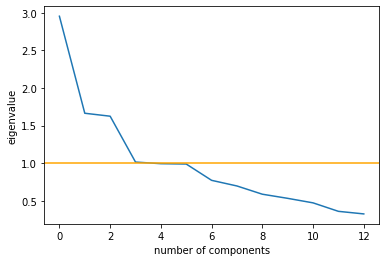

In [148]:
plt.plot(eigenvalues)
plt.xlabel('number of components')
plt.ylabel('eigenvalue')
plt.axhline(y=1, color='orange')
plt.show()

In [149]:
print(eigenvalues)

[2.953561847701104, 1.664527005604655, 1.6253016059708472, 1.015751765687237, 0.9944920712433167, 0.9897973674624058, 0.7730497224229762, 0.698131569259065, 0.588691460987571, 0.5337901719644559, 0.4736831400386705, 0.361101692090996, 0.3268205795665951]


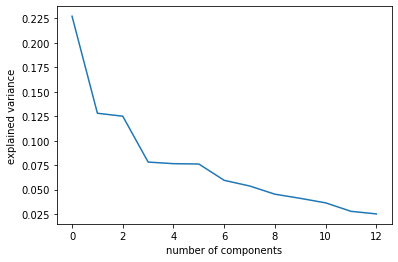

In [150]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()